In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['xtick.color'] = '#A9A9A9'
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.color'] = '#A9A9A9'

mpl.rcParams['grid.color'] = '#ffffff'

mpl.rcParams['axes.facecolor'] = '#ffffff'

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Machines only understand numbers. For instance, if you want to create a
spam detector, you have first to convert your text data into numbers
(for instance, through *word embeddings*). Data can then be stored in
vectors, matrices, and tensors. For instance, images are represented as
matrices of values between 0 and 255 representing the luminosity of each
color for each pixel. It is possible to leverage the tools and concepts
from the field of linear algebra to manipulate these vectors, matrices
and tensors.

Linear algebra is the branch of mathematics that studies *vector
spaces*. You’ll see how vectors constitute vector spaces and how linear
algebra applies linear transformations to these spaces. You’ll also
learn the powerful relationship between sets of linear equations and
vector equations, related to important data science concepts like *least
squares approximation*. You’ll finally learn important matrix
decomposition methods: *eigendecomposition* and *Singular Value
Decomposition* (SVD), important to understand unsupervised learning
methods like *Principal Component Analysis* (PCA).

Scalars and Vectors
===================

5.1 What are Vectors?
---------------------

Linear algebra deals with *vectors*. Other mathematical entities in the
field can be defined by their relationship to vectors: *scalars*, for
example, are single numbers that *scale* vectors (stretching or
contracting) when they are multiplied by them.

However, vectors refer to various concepts according to the field they
are used in. In the context of data science, they are a way to store
values from your data. For instance, take the height and weight of
people: since they are distinct values with different meanings, you need
to store them separately, for instance using two vectors. You can then
do operations on vectors to manipulate these features without loosing
the fact that the values correspond to different attributes.

You can also use vectors to store data samples, for instance, store the
height of ten people as a vector containing ten values.

##### Notation

We’ll use lowercase, boldface letters to name vectors (such as $\vv$).
(in other ressources, you might also encounter a letter with an arrow,
like $\vec v$, especially for handwriting, where boldface is not
possible.) As usual, refer to the Appendix
Section 12 to have the
summary of the notations used in this book.

### 5.1.1 Geometric and Coordinate Vectors

The word *vector* can refer to multiple concepts. Let’s learn more about
geometric and coordinate vectors.

*Coordinates* are values describing a position. For instance, any
position on earth can be specified by geographical coordinates
(latitude, longitude, and elevation).

#### Geometric Vectors

*Geometric vectors*, also called *Euclidean vectors*, are mathematical
objects defined by their magnitude (the length) and their direction.
These properties allow you to describe the displacement from a location
to another.

<figure>
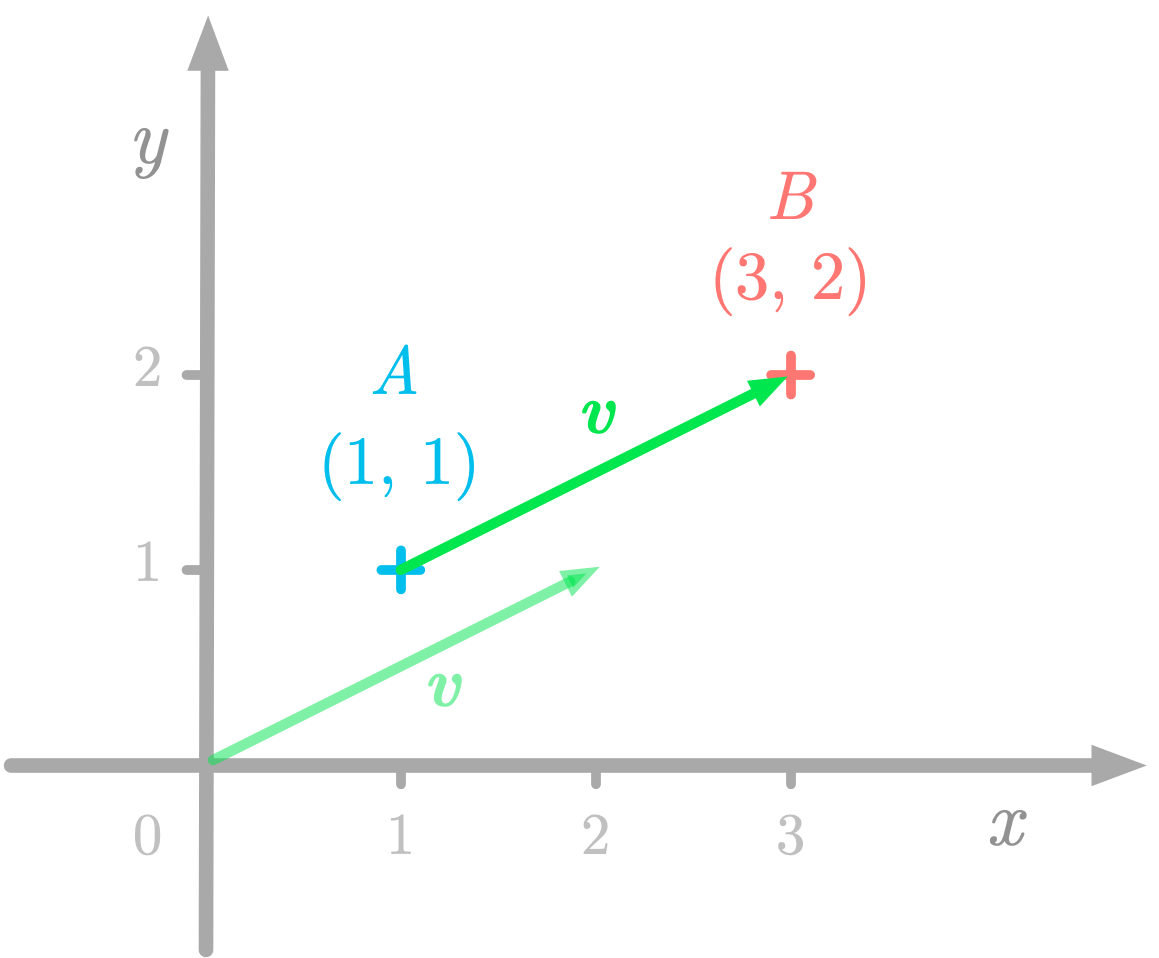<figcaption aria-hidden="true">Figure 73: A geometric vector running from <span class="math inline"><em>A</em></span> to <span class="math inline"><em>B</em></span>.</figcaption>
</figure>

For instance, Figure [73](#fig:ch06_geometric_vector) shows that the
point $A$ has coordinates (1, 1) and the point $B$ has coordinates (3,
2). The geometric vectors $\vv$ describes the displacement from $A$ to
$B$, but since vectors are defined by their magnitude and direction, you
can also represent $\vv$ as starting from the origin.

In Figure [73](#fig:ch06_geometric_vector), we used a coordinate system
called the *Cartesian plane*. The horizontal and vertical lines are the
*coordinate axes*, usually labeled respectively $x$ and $y$. The
intersection of the two coordinates is called the *origin* and
corresponds to the coordinate 0 for each axis.

In a Cartesian plane, any position can be specified by the $x$ and the
$y$ coordinates. The Cartesian coordinate system can be extended to more
dimensions: the position of a point in a $n$-dimensional space is
specified by $n$ coordinates. The real coordinate $n$-dimensional space,
containing $n$-tuples of real numbers, is named $\setR^n$. For instance,
the space $\setR^2$ is the two-dimensional space containing pairs of
real numbers (the coordinates). In three dimensions ($\setR^3$), a point
in space is represented by three real numbers.

#### Coordinate Vectors

*Coordinate vectors* are ordered lists of numbers corresponding to the
vector coordinates. Since vector initial points are at the origin, you
need to encode only the coordinates of the terminal point.

<figure>
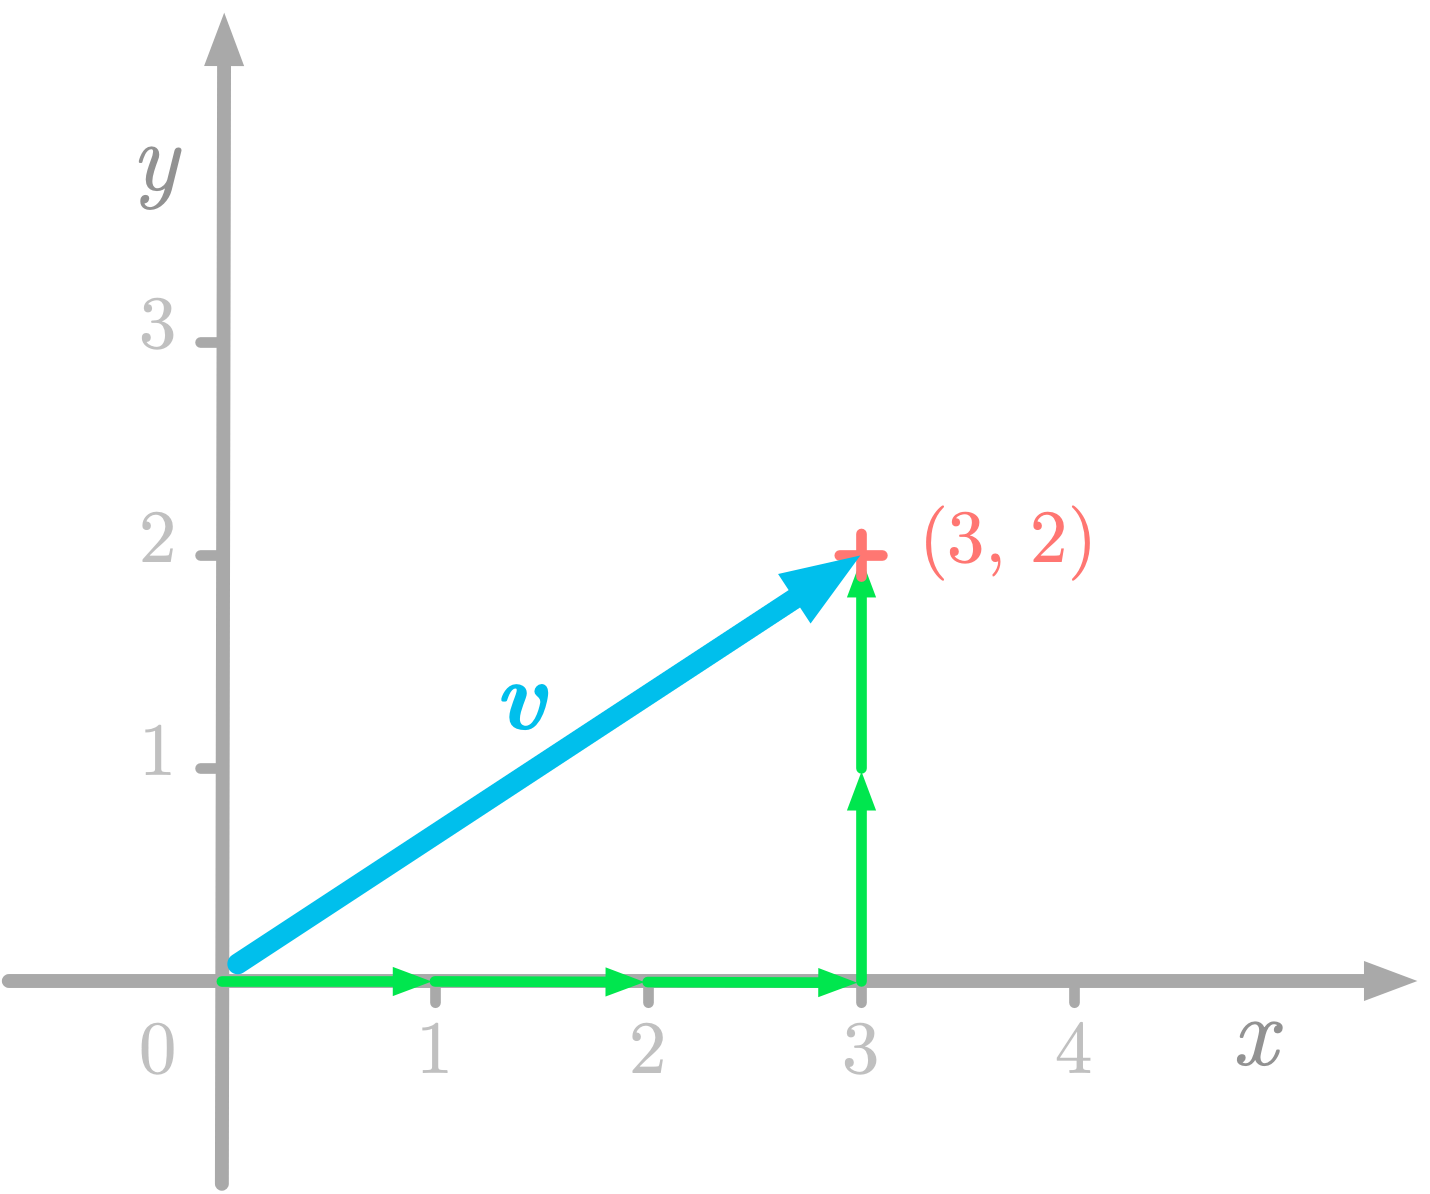<figcaption aria-hidden="true">Figure 74: The vector <span class="math inline">$\vv$</span> has coordinates (3, 2) corresponding to three units from the origin on the <span class="math inline"><em>x</em></span>-axis and two on the <span class="math inline"><em>y</em></span>-axis.</figcaption>
</figure>

For instance, let’s take the vector $\vv$ represented in Figure
[74](#fig:ch06_coordinate_vector). The corresponding coordinate vector
is as following:

$$
\vv = \begin{bmatrix}
3 \\\\
2
\end{bmatrix}
$$

Each value is associated with a direction: in this case, the first value
corresponds to the the $x$-axis direction and the second number to the
$y$-axis.

<figure>
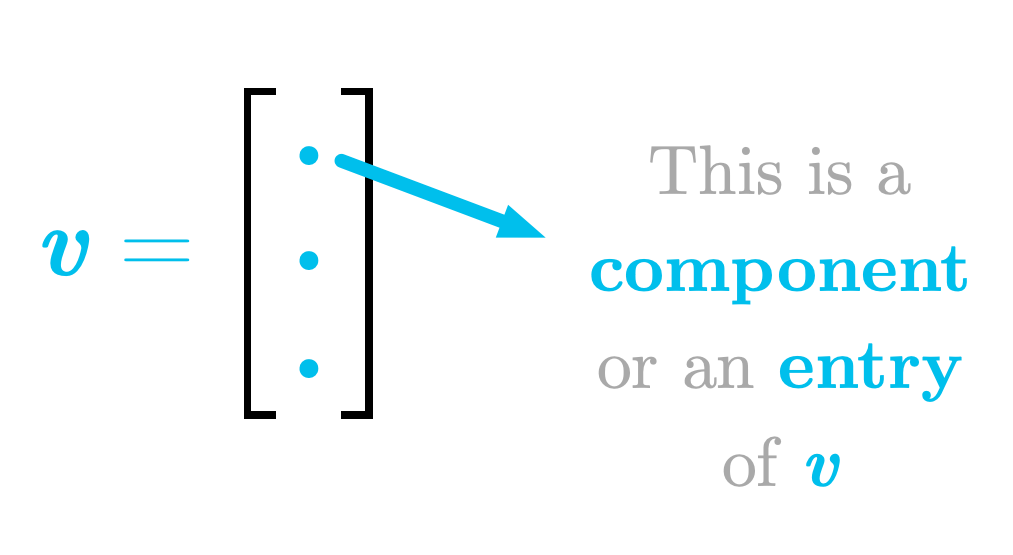<figcaption aria-hidden="true">Figure 75: Components of a coordinate vector.</figcaption>
</figure>

As illustrated in Figure [75](#fig:ch06_vector_component), these values
are called *components* or *entries* of the vector.

<figure>
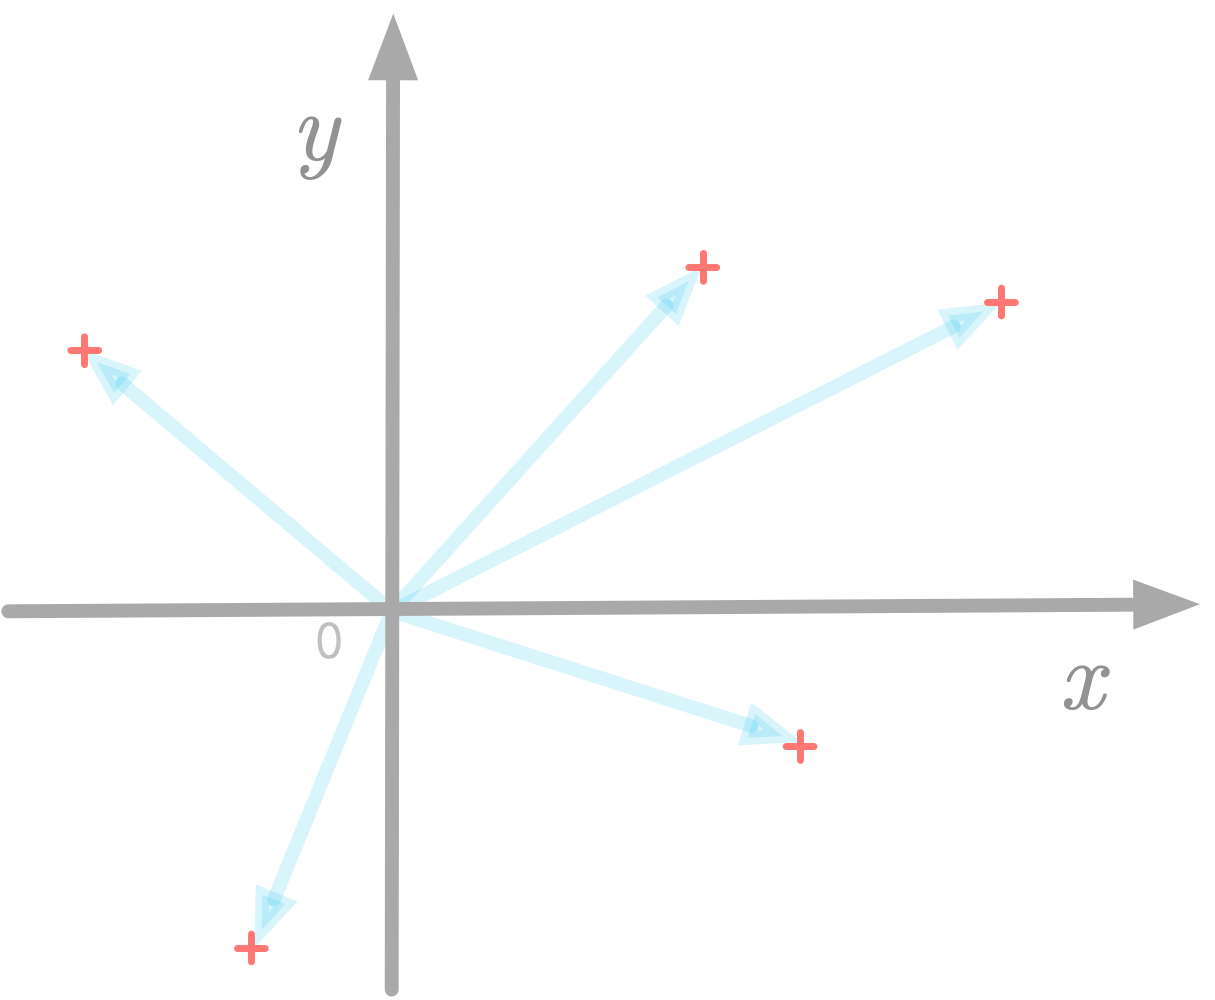<figcaption aria-hidden="true">Figure 76: Vectors can be represented as points in the Cartesian plane.</figcaption>
</figure>

In addition, as represented in Figure [76](#fig:ch06_vectors_as_points),
you can simply represent the terminal point of the arrow: this is a
scatter-plot.

##### Indexing

*Indexing* refers to the process of getting a vector component (one of
the values from the vector) using its position (its index).

Python uses zero-based indexing, meaning that the first index is zero.
However mathematically, the convention is to use one-based indexing.
I’ll denote the component $i$ of the vector $\vv$ with a subscript, as
$v_i$, without bold font because the component of the vector is a
scalar.

##### Numpy

In Numpy, vectors are called *one-dimensional arrays*. You can use the
function `np.array()` to create one:

In [2]:
v = np.array([3, 2])
v

array([3, 2])

##### More Components

Let’s take the example of $\vv$, a three-dimensional vectors defined as
following:

$$
\vv = \begin{bmatrix}
3 \\\\
4 \\\\
2
\end{bmatrix}
$$

As shown in in Figure [77](#fig:ch06_vector_3d), you can reach the
endpoint of the vector by traveling 3 units in the $x$-axis, 4 in the
$y$-axis, and 2 in the $z$-axis.

<figure>
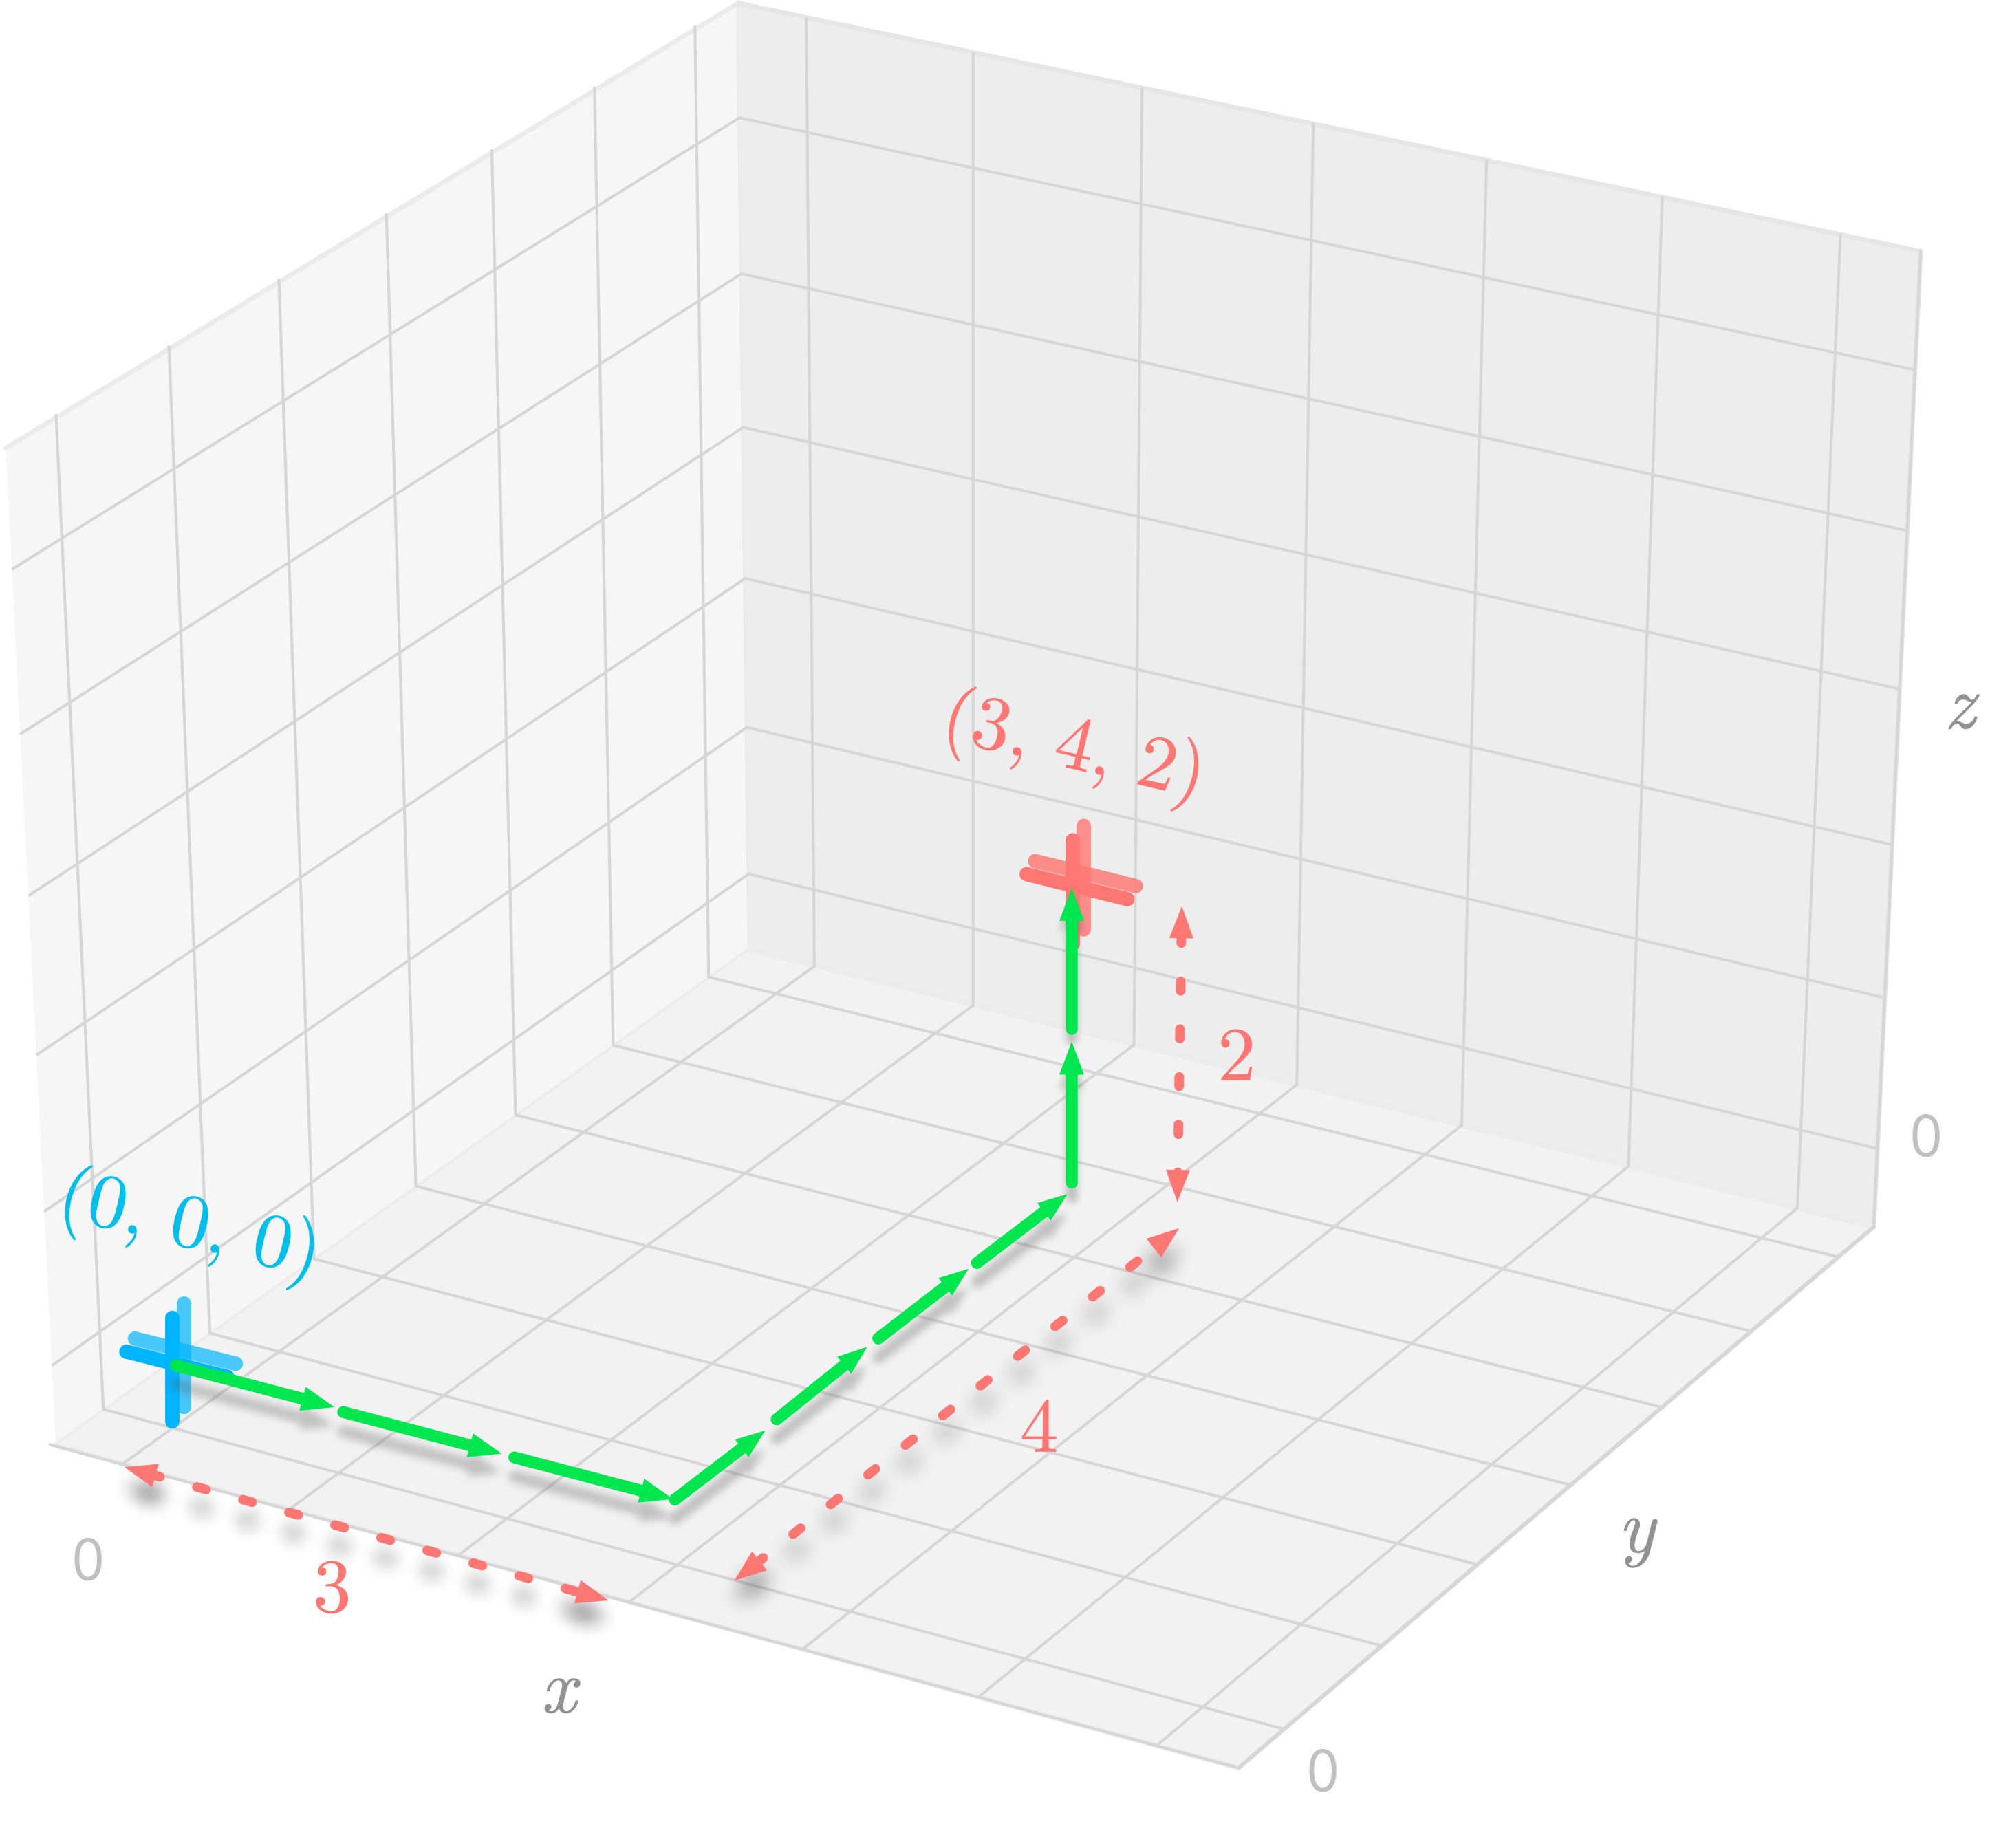<figcaption aria-hidden="true">Figure 77: Three-dimensional representation of the origin at (0, 0, 0) and the point at (3, 4, 2).</figcaption>
</figure>

More generally, in a $n$-dimensional space, the position of a terminal
point is described by $n$ components.

#### Dimensions

You can denote the dimensionality of a vector using the *set* notation
$\setR^n$. It expresses the *real coordinate space*: this is the
$n$-dimensional space with real numbers as coordinate values.

For instance, vectors in $\setR^3$ have three components, as the
following vector $\vv$ for example:

$$
\vv = \begin{bmatrix}
2.0 \\\\
1.1 \\\\
-2.5
\end{bmatrix}
$$

#### Vectors in Data Science

In the context of data science, you can use coordinate vectors to
represent your data.

You can represent data samples as vectors with each component
corresponding to a feature. For instance, in a real estate dataset, you
could have a vector corresponding to an apartment with its features as
different components (like the number of rooms, the location etc.).

Another way to do it is to create one vector per feature, each
containing all observations.

Storing data in vectors allows you to leverage linear algebra tools.
Note that, even if you can’t visualize vectors with a large number of
components, you can still apply the same operations on them. This means
that you can get insights about linear algebra using two or three
dimensions, and then, use what you learn with a larger number of
dimensions.

### 5.1.2 Vector Spaces

A *vector space* is a collection of vectors. You can use uppercase
letters to refer to vector spaces, as $V$ for instance. Mathematically,
any vector in a vector space must satisfy the following statements
(these rules are called *axioms*).

#### Axioms

For all $\vu, \vv, \vw \in V$ (the symbol $\in$ is pronounced “in”,
meaning that the vectors are in the space $V$ and thus that the
following axioms must holds for each vector in the space $V$):

-   $\vu + \vv = \vv + \vu$.
-   $(\vu + \vv) + \vw = \vu + (\vv + \vw)$.
-   There exists an element 0 so that $\vu + 0 = \vu$ for all $\vu$.
-   For all $\vu$, there exists an element $-\vu$ so that:
    $\vu + (-\vu) = 0$.
-   $(c + d)\vu = c\vu + d\vu$.
-   $c(\vu + \vv) = c\vu + c\vv$.
-   $c(d\vu) = (cd)\vu$.
-   There exists an element $1 \cdot \vu = \vu$.

A set (that is, a collection of elements) that satisfies these axioms is
called a vector space, and its elements are called vectors. You can
imagine various vector spaces, the vectors only have to satisfy the
axioms.

### 5.1.3 Special Vectors

There are some special vectors important to know in linear algebra and
data science.

#### Row and Columns Vectors

You can distinguish vectors according to their shape. Numbers are
organized as a column in *column vectors*, as in the following vector
$\vu$ :

$$
\vu = \begin{bmatrix}
2 \\\\
1
\end{bmatrix}
$$

They are organized as a row in *row vectors*, as in the following vector
$\vv$:

$$
\vv = \begin{bmatrix}
2 & 1
\end{bmatrix}
$$

And what about this difference in Numpy’s vectors? Let’s create a vector
with Numpy:

In [3]:
v_row = np.array([1, 2, 3])
v_row

array([1, 2, 3])

You can use the property `shape` to check the shape of the array:

In [4]:
v_row.shape

(3,)

You can see that there is only one dimension (the shape has one number).
This is because Numpy doesn’t distinguish between row and column
vectors. To make this distinction, you need to create a matrix with one
column or one row (as you’ll see in
Section 6).

#### Unit Vectors

*Unit vectors* are vectors with a length of one. You’ll see the concept
of vector length in Section 5.3.

#### Zero Vectors

A *zero vector* is a vector such that adding it to another vector
doesn’t change this vector.

#### Orthogonal Vectors

Two vectors are called *orthogonal* when they run in perpendicular
directions. You can see a geometric example of two orthogonal vectors in
Figure [78](#fig:ch06_orthogonal_vectors).

<figure>
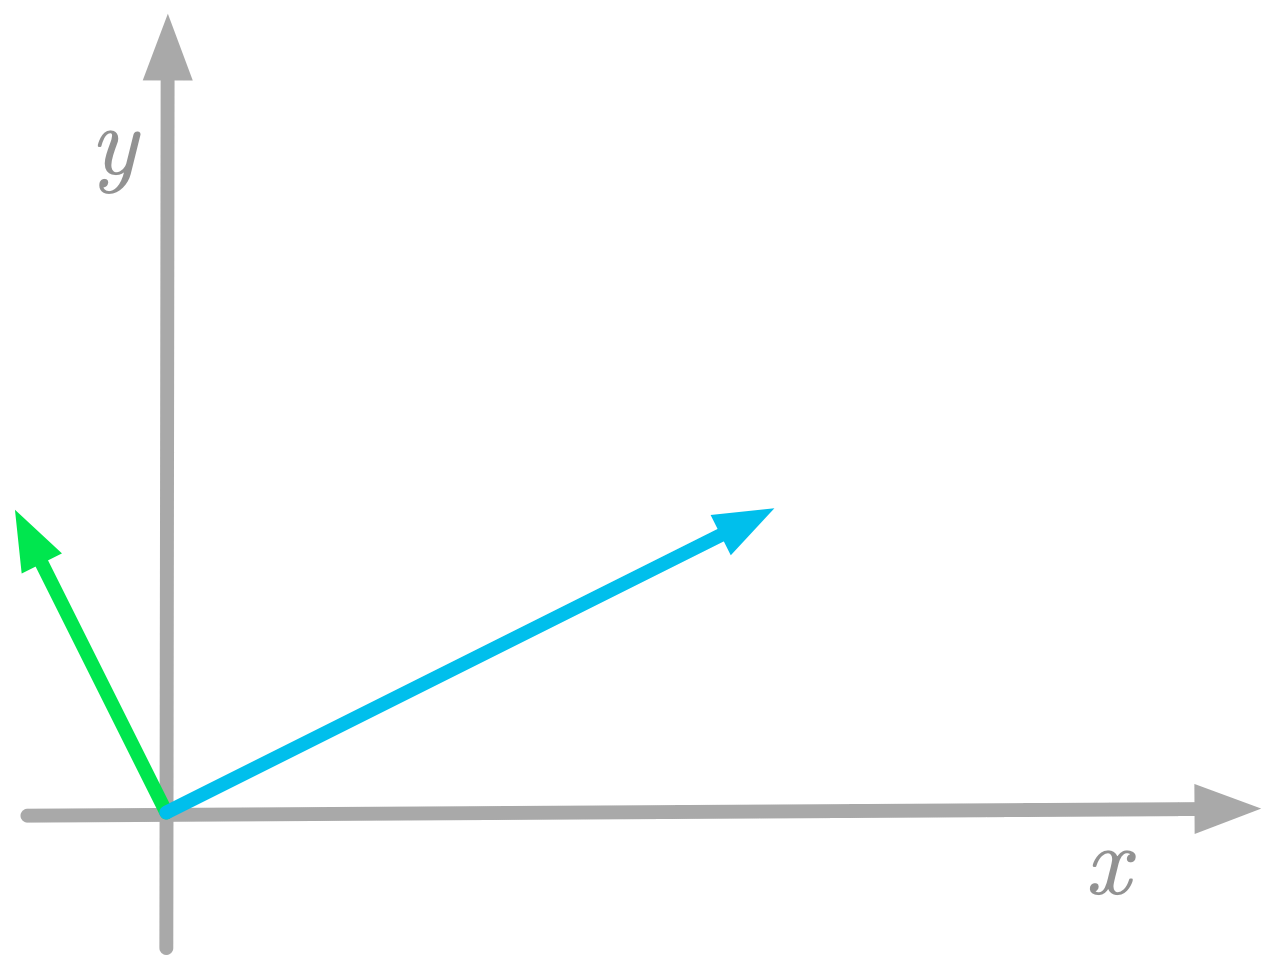<figcaption aria-hidden="true">Figure 78: Two orthogonal vectors.</figcaption>
</figure>

If the length of both orthogonal vectors is one (that is, if they are
unit vectors), then they are called *orthonormal*.

5.2 Operations and Manipulations on Vectors
-------------------------------------------

Addition and scalar multiplication are the two major operations in
linear algebra.

### 5.2.1 Scalar Multiplication

Scalar multiplication is the operation of multiplying a vector with a
scalar. When multiplied by a scalar, a vector gives another vector,
which is a *scaled* version of the initial vector. It rescales the
vector.

#### Example

Let’s have the following vector $\vv$:

$$
\vv=
\begin{bmatrix}
2 \\\\
1
\end{bmatrix}
$$

<figure>
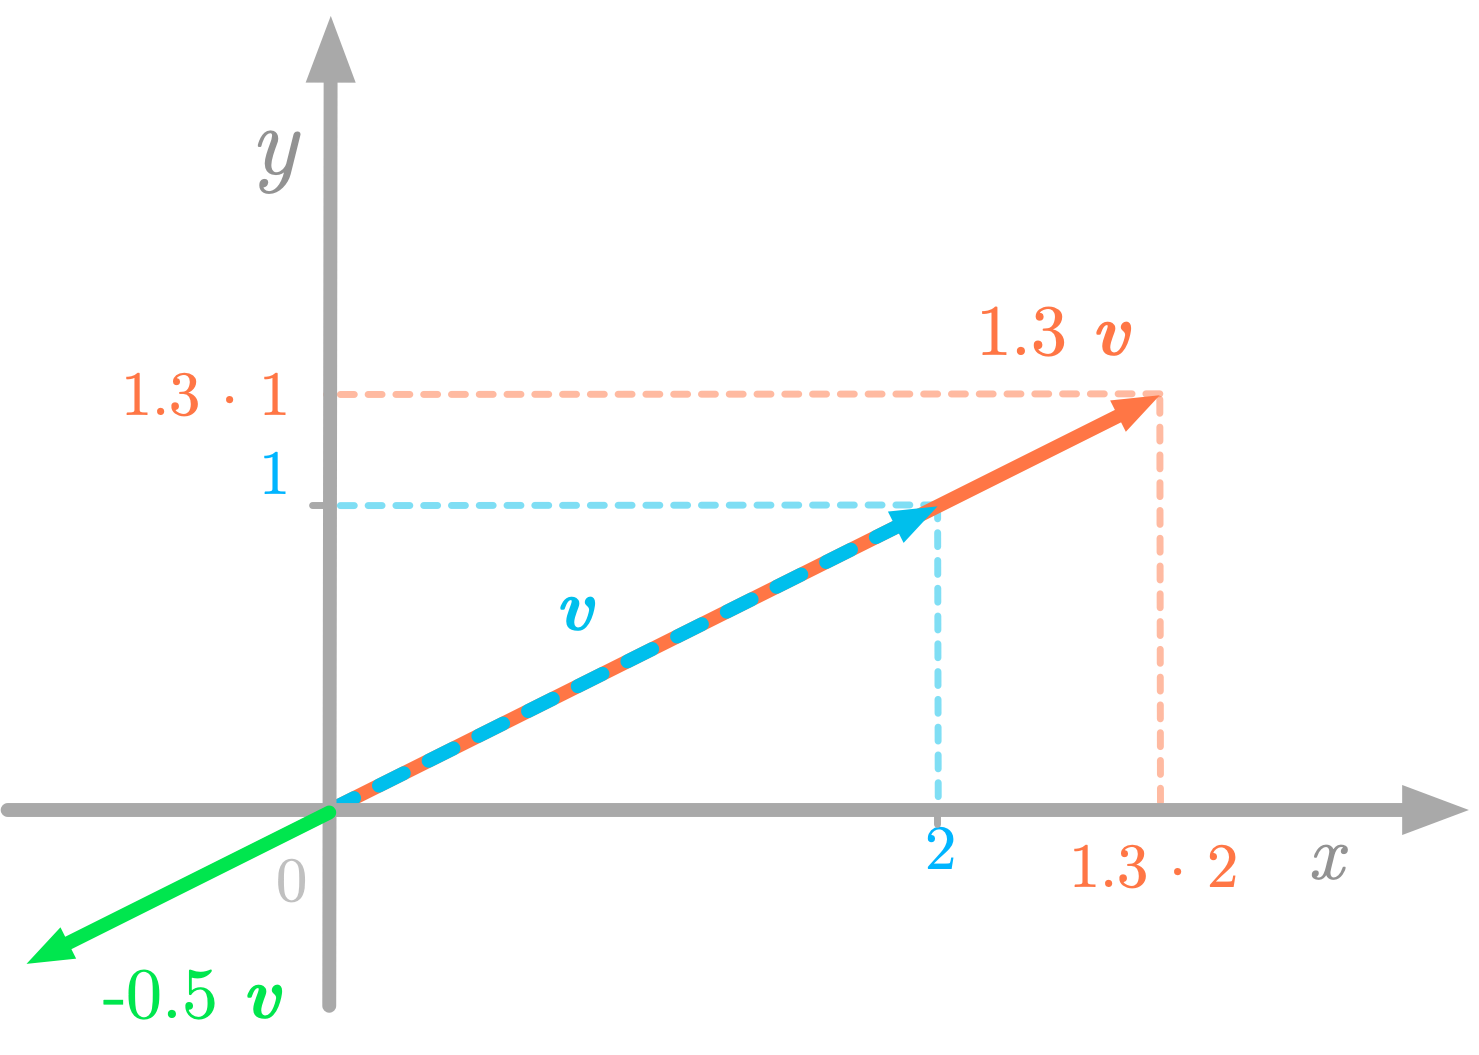<figcaption aria-hidden="true">Figure 79: Multiplication of the vector <span class="math inline">$\vv$</span> by scalars (1.3 in red and -0.5 in green).</figcaption>
</figure>

The vector $\vv$ is represented in Figure
[79](#fig:ch06_geometric_vector_multiplication_scalar) (in blue) with
two rescaled versions (multiplied by 1.3 and -0.5). You can also see
that the scalar multiplication is done by multiplying each component of
the vector by the scalar:

$$
1.3\vv =
1.3\begin{bmatrix}
2 \\\\
1
\end{bmatrix} =
\begin{bmatrix}
1.3 \cdot 2 \\\\
1.3 \cdot 1
\end{bmatrix}
=
\begin{bmatrix}
2.6 \\\\
1.3
\end{bmatrix}
$$

You can do it using Numpy:

In [5]:
v = np.array([2, 1])
v

array([2, 1])

In [6]:
1.3 * v

array([2.6, 1.3])

Numpy implements what is called *vectorized operations*, meaning that
under the hood, it uses compiled C code, making the computations way
faster than for loops. (you can for instance read
https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html\#Vectorized-Operations)

### 5.2.2 Vector Addition

When you add two vectors, you get a third vector. Consider the two
vectors $\vu$ and $\vv$ illustrated in Figure
[80](#fig:ch06_vector_addition_steps).

<figure>
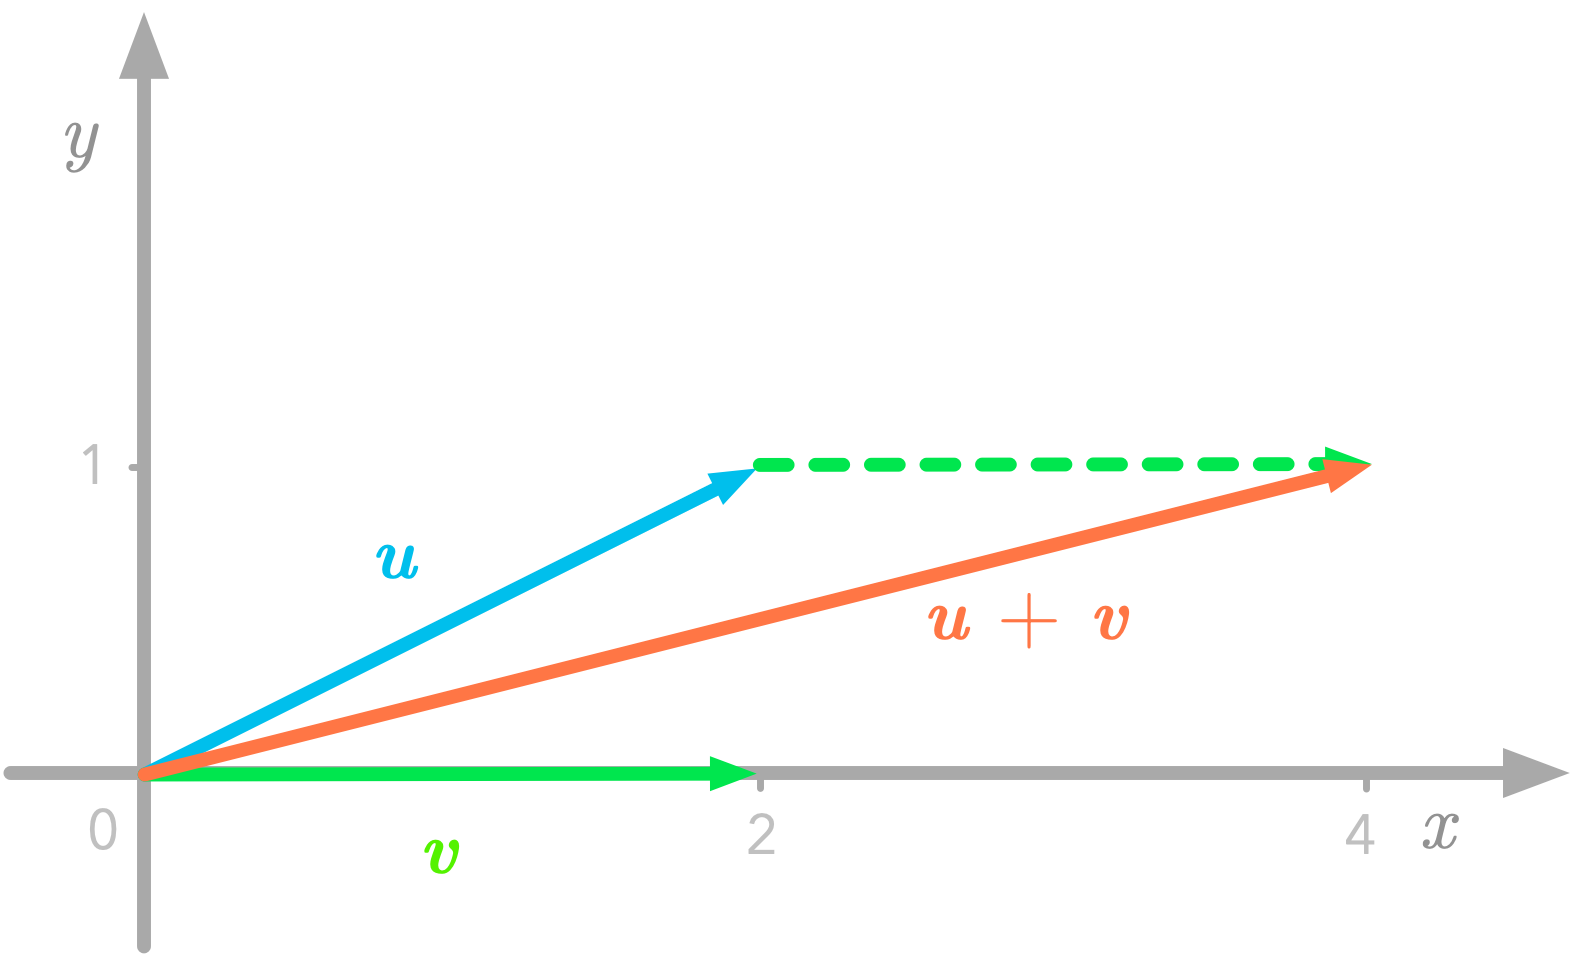<figcaption aria-hidden="true">Figure 80: Adding the vectors <span class="math inline">$\vu$</span> and <span class="math inline">$\vv$</span> gives a new vector.</figcaption>
</figure>

If you take $\vv$ and put it at the end of $\vu$ as represented with the
dotted green line, you get the sum of the two vectors (the other way
works as well: $\vu + \vv = \vv + \vu$).

Let’s consider the coordinates of these geometric vectors. The vectors
$\vu$ and $\vv$ are defined as following:

$$
\vu = \begin{bmatrix}
2 \\\\
1
\end{bmatrix}
$$

and

$$
\vv = \begin{bmatrix}
2 \\\\
0
\end{bmatrix}
$$

You can sum these vectors by adding their respective coordinates:

$$
\vu + \vv = \begin{bmatrix}
2 \\\\
1
\end{bmatrix} +
\begin{bmatrix}
2 \\\\
0
\end{bmatrix} = 
\begin{bmatrix}
2 + 2 \\\\
1 + 0
\end{bmatrix}
= \begin{bmatrix}
4 \\\\
1
\end{bmatrix}
$$

Let’s do this vector addition with Numpy:

In [7]:
v1 = np.array([2, 1])
v2 = np.array([2, 0])
v1 + v2

array([4, 1])

### 5.2.3 Transposition

The *transposition* of a vector transforms a row vector into a column
vector and vice versa. It is denoted as the superscript letter
$\text{T}$. For instance, $\vv^{\text{T}}$ corresponds to the transpose
of the vector $\vv$:

$$
\begin{bmatrix}
x \\\\
y
\end{bmatrix}^\text{T}
=
\begin{bmatrix}
x & y
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
x & y
\end{bmatrix}^\text{T}
=
\begin{bmatrix}
x \\\\
y
\end{bmatrix}
$$

With Numpy, the transpose of a vector is given by the simple letter `T`.
However, since Numpy doesn’t discriminate between row and column
vectors, transposition will have no effect on one-dimensional arrays
(but, as you’ll see, it is useful with matrices):

5.3 Norms
---------

A *norm* is a function that takes a vector and returns a single number
and which satisfies the rules you’ll see in this section. You can think
of the norm of a vector as its length. It is denoted with double
vertical bars:

$$
\norm{\vu}
$$

Don’t confuse the norm notation with the absolute values notation which
uses single vertical bars ($\left| a \right|$). (the similarity between
these symbols comes from the fact that the absolute value can be
considered as an special case of norm:
https://math.stackexchange.com/a/16167/484100)

It is common to use norms to evaluate the distance between two vectors
$\vu$ and $\vv$. You calculate the differences between them
($\vw = \vu - \vv$) and calculate the norm of the new vector $\vw$. For
this reason, norms are crucial in machine learning and deep learning.
More specifically it is used in:

-   Cost function: you can use the norm of a vector containing error
    values (for instance differences between true values and estimated
    values).
-   Regularization: as you’ll see in
    Section 5.5, you can
    use the norm of the vector containing the model parameters as a way
    to estimate how large they are. Adding this term to the cost
    function helps avoiding large parameter values, which is known to
    reduce overfitting.

### 5.3.1 Definitions

There are various ways to calculate the length of a vector, and thus,
multiple kinds of norms. You can call a mathematical entity a norm only
if it satisfies the following rules:

1.  Non-negativity: norms must be non-negative. If you interpret the
    norm of a vector as its length, you can see that there is no such
    things as negative length.
2.  Zero-vector norm: the norm of vector is zero if and only if the
    vector is a zero-vector (vectors that don’t modify other vectors
    when added to them, as you saw in
    Section 5.1.3.3).
3.  Scalar multiplication: the norm of a vector multiplied by a scalar
    corresponds to the absolute value of this scalar multiplied by the
    norm of the vector. For instance, with the scalar $k$ and the vector
    $\vu$, you have
    $\norm{k \cdot \vu} = \left| k \right| \cdot \norm{\vu}$.
4.  Triangle inequality: the norm of the sum of two vectors is less than
    or equal to the sum of their norms. You can write this
    mathematically as following:

$$
\norm{\vu + \vv} \leq \norm{\vu} + \norm{\vv}
$$

As shown graphically in Figure [81](#fig:ch06_triangle_inequality),
triangle inequality simply means that the shortest path between two
points is a line.

<figure>
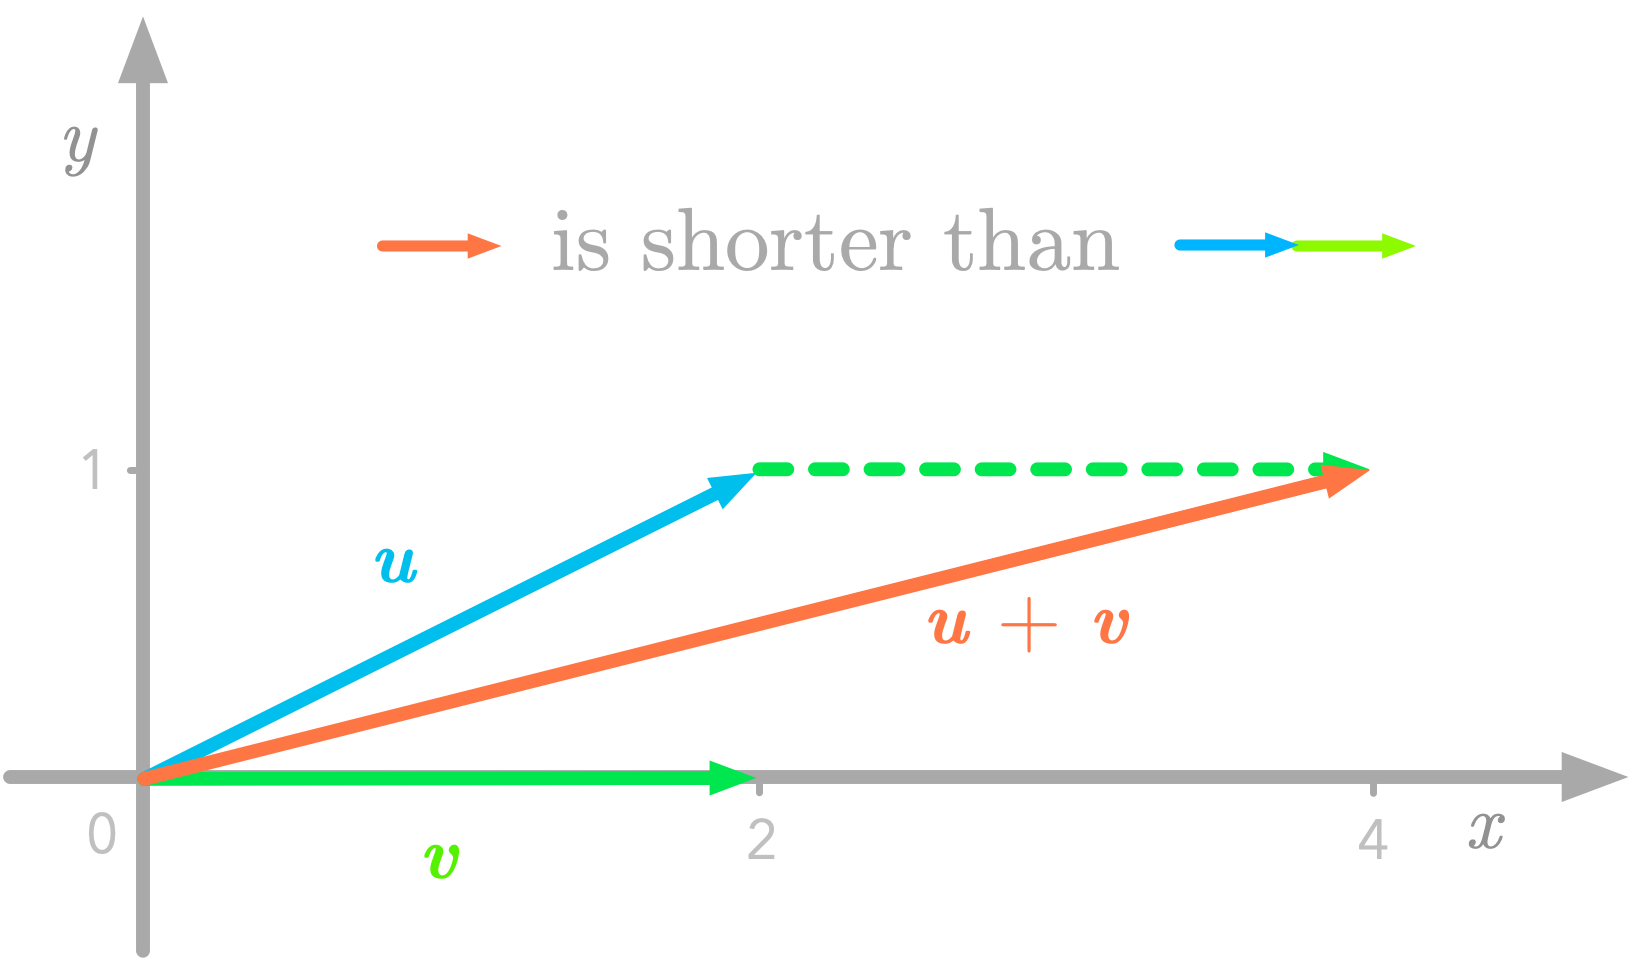<figcaption aria-hidden="true">Figure 81: Illustration of the triangle inequality.</figcaption>
</figure>

### 5.3.2 Common Vector Norms

In machine learning and deep learning, it is important to be able to
compare vectors. Norms provide a way to do that and is used as a metric
quantifying the difference between them. The kind of norm that you use
change how these differences are weighted in the metric (for instance,
if you consider the large differences as much as the small ones).

As you’ll see, many norms fall into the category of *p-norms*, which are
calculated as the sum of the absolute value of each component raised to
the power of $p$. The result of this sum is then raised to the power of
$\frac{1}{p}$. It may be easier to read the mathematical formula:

$$
\norm{\vx}_p= \left(\sum_{i=1}^m \left| \evx_i \right|^p \right)^{\frac{1}{p}}
$$

with $\vx$ a vector, $m$ its number of components, $i$ the index of the
current vector component.

Different values of $p$ give different norms. Let’s see the more common.

#### $L^2$ Norm

The *$L^2$ norm* is extensively used in machine learning and deep
learning. It is also called *weight decay* in the context of
regularization of deep neural networks.

The vector length measured with the $L^2$ norm corresponds to an
*Euclidean distance*, that is, the physical distance in the real world,
which is a consequence of the Pythagorean theorem. The formula is as
follows:

$$
\begin{aligned}
\norm{\vx}_2 &= \left(\sum_{i=1}^m \left| \evx_i \right|^2 \right)^{\frac{1}{2}}
= \sqrt{\sum_{i=1}^m \left| \evx_i \right|^2}
= \sqrt{\sum_{i=1}^m\evx_i^2}
\end{aligned}
$$

with $\vx$ the vector, $m$ its number of components, and $i$ the index
of current component. Note that you don’t need to take the absolute
value of coordinates since they are raised to the power of two.

You can use the function `np.linalg.norm` from Numpy with the parameter
`ord` set to 2 to calculate the $L^2$ norm:

In [8]:
u = np.array([2, 1])
np.linalg.norm(u, ord=2)

2.23606797749979

#### Squared L2 Norm

For computation reasons, the squared $L^2$ norm can be preferred over
the $L^2$ norm. For instance, in the context of minimizing a cost
function, squaring the function doesn’t change its minimum. Squaring the
$L^2$ norm allows you to get rid of the square root in the formula.

$$
\begin{aligned}
\norm{\vx}_2^2 &= \left(\sqrt{\sum_{i=1}^m\evx_i^2} \right)^2
= \sum_{i=1}^m\evx_i^2
\end{aligned}
$$

The resulting norm function is the sum of the squared vector components.

In addition, as you’ll see in
Section 5.4 the squared $L^2$
norm can be calculated using the dot product, which is computationally
advantageous.

The Mean Squared Error (MSE; as you used in
Section 1.3.1) resembles the squared
$L^2$ norm. The difference is that you take the average of the squared
errors with the MSE and the sum of the squared errors with the squared
$L^2$ norm.

With neural networks, you calculate the cost and its derivative (as you
saw in Section 1.3), so it is
advantageous to use cost functions that are easily calculated and simple
to differentiate from a computing perspective. The squared $L^2$ norm
can be easily vectorized, which is highly desirable since it permits
faster computations and parallelizations. At the hardware level,
vectorized code can be optimized and computations can be ran in parallel
(here is more details about why vectorized code is faster:
https://stackoverflow.com/questions/35091979/why-is-vectorization-faster-in-general-than-loops)
.

#### $L^1$ Norm

The *$L^1$ norm* is a function returning the sum of the absolute value
of the components:

$$
\begin{aligned}
\norm{\vx}_1 &= \left(\sum_{i=1}^m \left| \evx_i \right| ^1 \right)^{\frac{1}{1}}
= \sum_{i=1}^m \left| \evx_i \right|
\end{aligned}
$$

with $\vx$ the vector, $m$ its number of components, and $i$ the index
of the current component.

The $L^1$ norm is also called the *Manhattan distance* or the *taxicab
distance* because of the displacement of a taxi in a street grid, like
in Manhattan.

As illustrated in Figure [82](#fig:ch06_taxi_cab), a taxi driver going
from A to B would prefer to take the yellow diagonal path if she could.
It is because the $L^2$ norm represents the physical world. This is
different with the $L^1$ norm: the three paths have the same length. For
instance, the $L^1$ length of the diagonal vector is 6 (because it is
the sum of its $x$ and $y$ component: $3+3=6$), which is identical to
the other paths.

<figure>
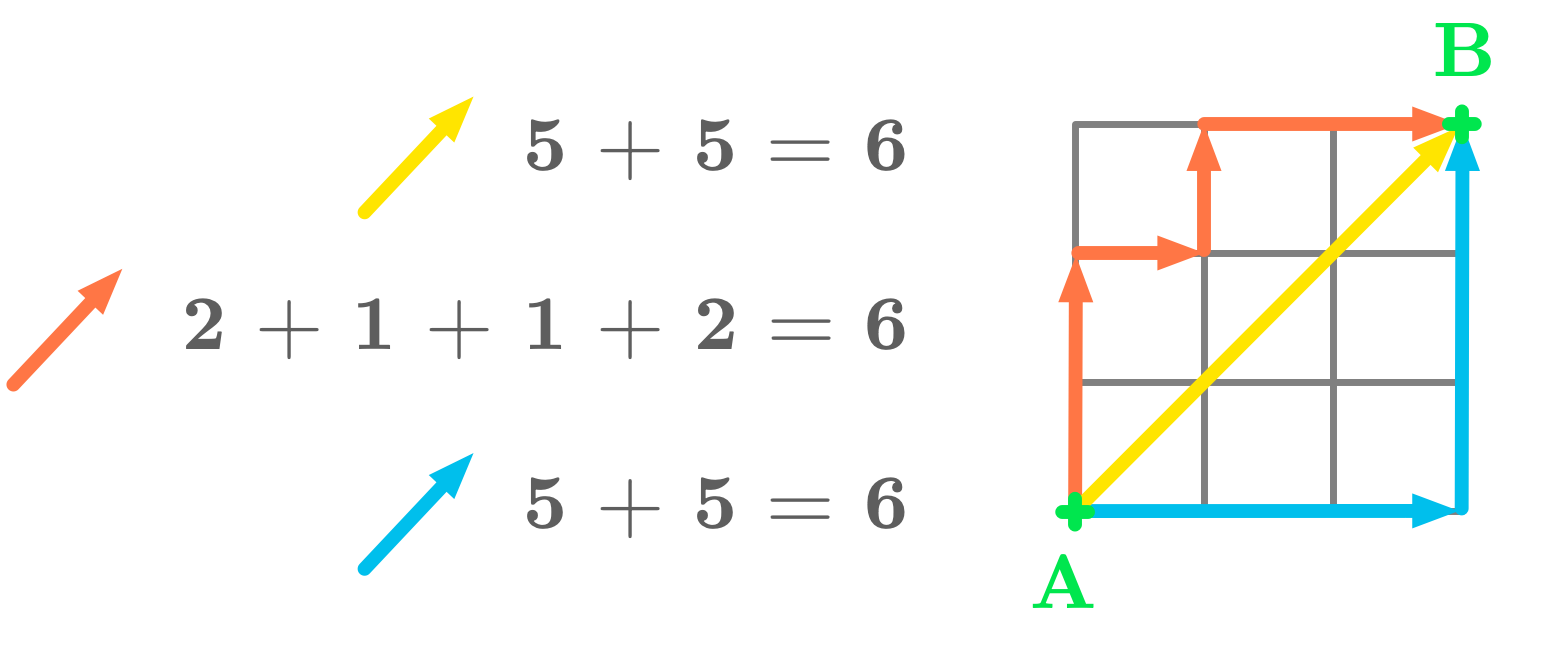<figcaption aria-hidden="true">Figure 82: With the Manhattan distance, each path has the same length.</figcaption>
</figure>

The $L^1$ norm of $\vu$ can be calculated with Numpy as follows:

In [9]:
np.linalg.norm(u, ord=1)

3.0

#### Max Norm

The $L^\infty$, or *max norm* (also called the *Chebyshev norm*) is a
function returning the largest component of the vector.

Max norms are typically used as a constraint on the weights of neural
networks (for instance in association with dropout: Srivastava, Nitish,
et al. “Dropout: a simple way to prevent neural networks from
overfitting.” The journal of machine learning research 15.1 (2014):
1929-1958.) . Weight constraints differs from weight penalties: with
weight penalties, a regularization term is added to the cost function,
while with weight constraints, the weights are forced to be lower than a
threshold. (weight constraints allows you to use large learning rates.
See for instance, Hinton, Geoffrey E., et al. “Improving neural networks
by preventing co-adaptation of feature detectors.” arXiv preprint
arXiv:1207.0580 (2012).)

This norm is mathematically denoted as:

$$
\norm{\vx}_\infty = \max\limits_i \left| \evx_i \right|
$$

It can be calculated with Numpy:

In [10]:
u = np.array([1, 0, 0, -1.532, 230, 0.23, 1.7])
np.linalg.norm(u, ord=np.inf)

230.0

### 5.3.3 Norm Representations

You can visualize the differences between norms by looking at the *unit
circle*. The unit circle is a representation of all the unit vectors
(the vectors with a norm equals to 1). So, the unit circle is a shape
where every point has a distance of one from the center. According to
the kind of distance you use ($L^1$, $L^2$, or max norm), this shape is
different.

<figure>
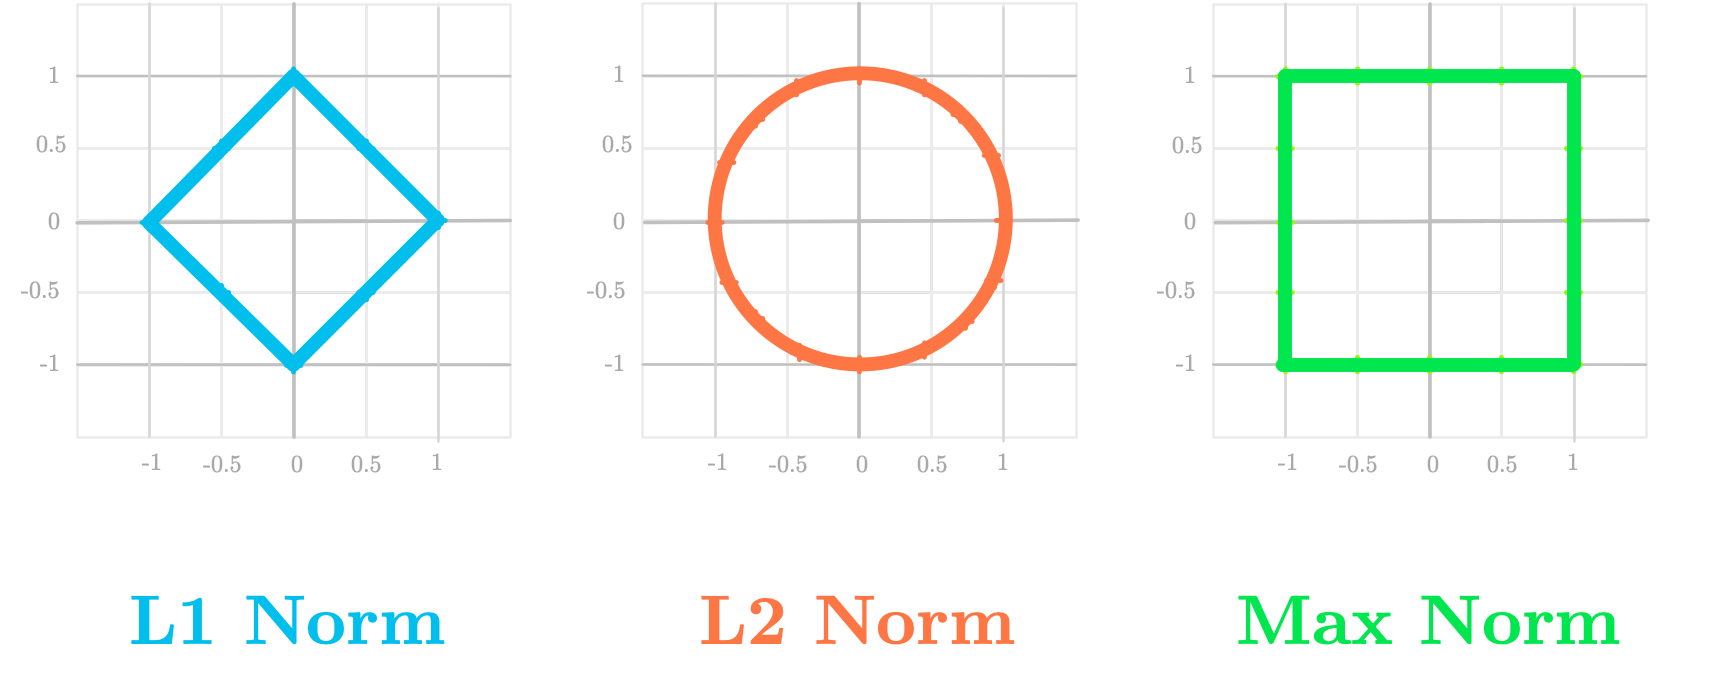<figcaption aria-hidden="true">Figure 83: Comparison of the unit shapes corresponding to the <span class="math inline"><em>L</em><sup>1</sup></span>, <span class="math inline"><em>L</em><sup>2</sup></span> and max norm.</figcaption>
</figure>

Figure [83](#fig:ch06_unit_circle_all) shows that different norms gives
you different unit shapes: a diamond shape for the $L^1$ norm, a circle
for the $L^2$ norm and a square for the max norm. When used as
regularization, these shapes have an effect on how the weights are
penalized.

For instance, the corners of the diamond correspond to the case where
one of the vector component equals zero, which leads to the model
sparsity associated with the $L^1$ norm (you’ll see more about this in
Section 5.5). The circle
corresponding to the $L^2$ norm is what you expect in the physical
world: every point on a circle has the same distance from the center.
For the max norm, the maximum of the two components is one for each
point on the unit shape.

5.4 The Dot Product
-------------------

The *dot product* (referring to the dot symbol used to characterize this
operation), also called *scalar product*, is an operation done on
vectors. It takes two vectors, but unlike addition and scalar
multiplication, it returns a single number (a scalar, hence the name).
It is an example of a more general operation called the *inner product*.

<figure>
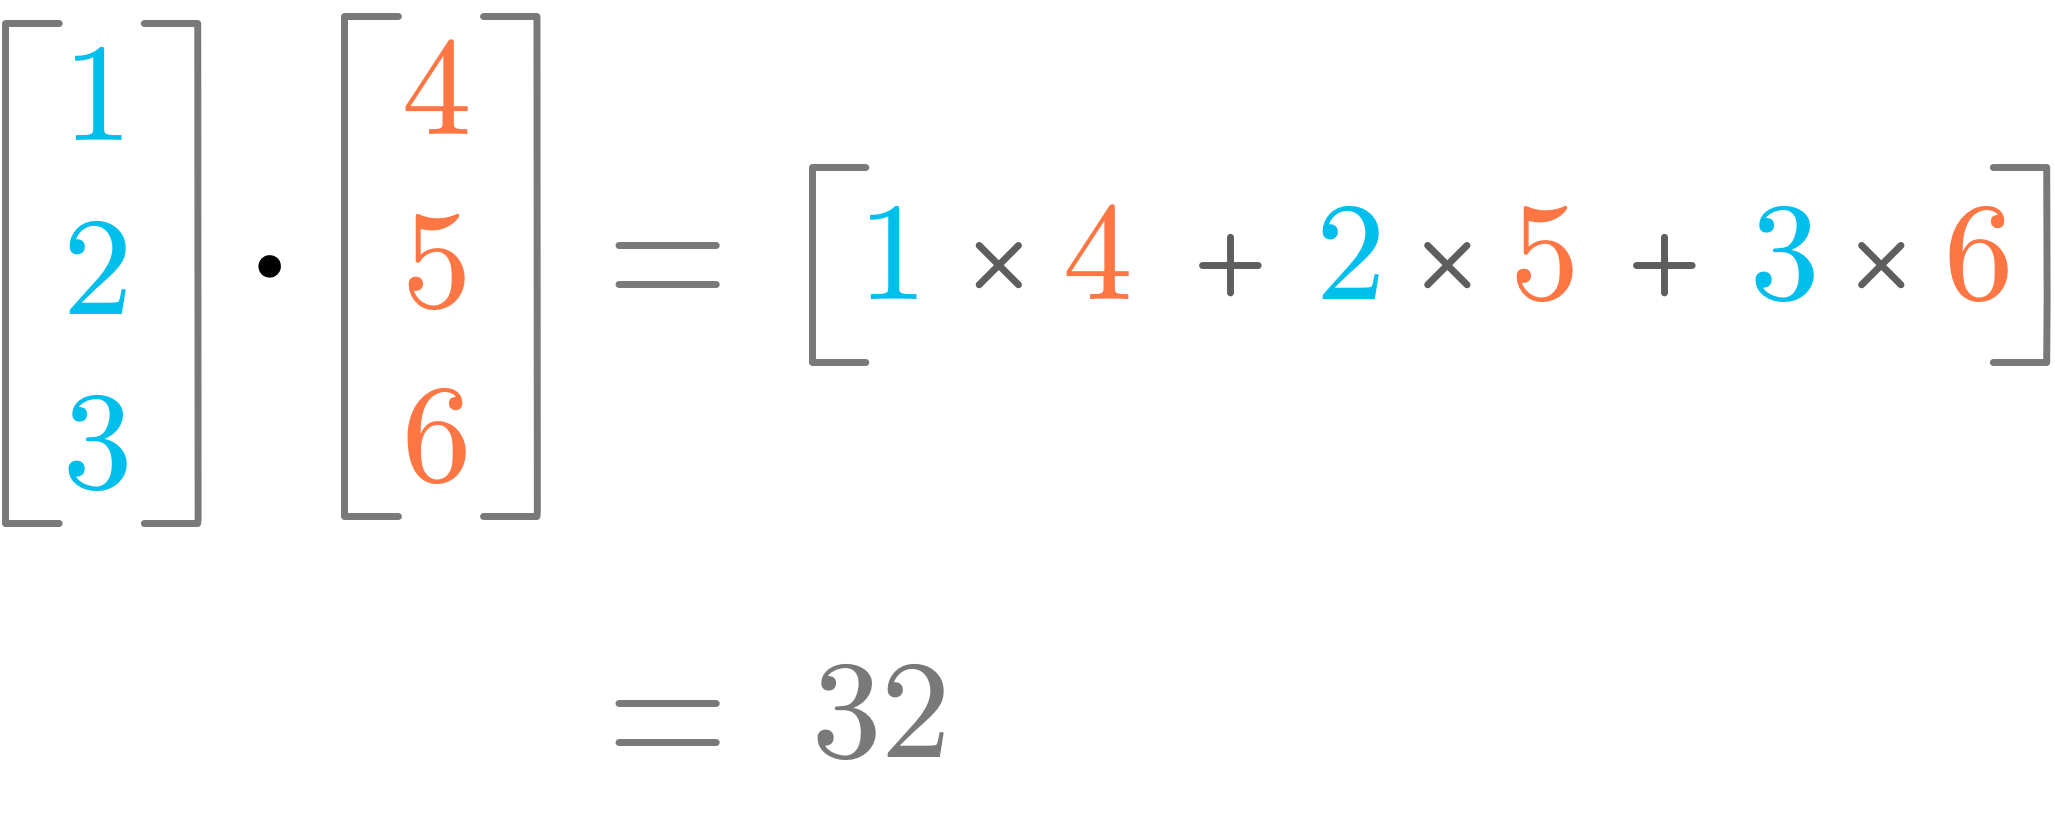<figcaption aria-hidden="true">Figure 84: Illustration of the dot product.</figcaption>
</figure>

Figure [84](#fig:ch06_dot_product_vectors) shows an illustration of how
the dot product works. You can see that it corresponds to the sum of the
multiplication of the components with same index.

### 5.4.1 Definition

The dot product between two vectors $\vu$ and $\vv$, denoted by the
symbol $\cdot$, is defined as the sum of the product of each pair of
components. More formally, it is expressed as:

$$
\vu \cdot \vv = \sum_{i=1}^m \evu_i\evv_i
$$

with $m$ the number of components of the vectors $\vu$ and $\vv$ (they
must have the same number of components), and $i$ the index of the
current vector component.

Note that the symbol of the dot product is the same as the dot used to
refer to multiplication between scalars. The context (if the elements
are scalars or vectors) tells you which one it is.

Let’s take an example. We have the following vectors:

$$
\vu =
\begin{bmatrix}
2 \\\\
4 \\\\
7
\end{bmatrix}
$$

and

$$
\vv =
\begin{bmatrix}
5 \\\\
1 \\\\
3
\end{bmatrix}
$$

The dot product of these two vectors is defined as:

$$
\vu \cdot \vv =
\begin{bmatrix}
2 \\\\
4 \\\\
7
\end{bmatrix}
\cdot
\begin{bmatrix}
5 \\\\
1 \\\\
3
\end{bmatrix} =
2 \times 5 + 4 \times 1 + 7 \times 3 = 35
$$

The dot product between $\vu$ and $\vv$ is 35. It converts the two
vectors $\vu$ and $\vv$ into a scalar.

Let’s use Numpy to calculate the dot product of these vectors. You can
use the method `dot()` of Numpy arrays:

In [11]:
u = np.array([2, 4, 7])
v = np.array([5, 1, 3])
u.dot(v)

35

It is also possible to use the following equivalent syntax:

In [12]:
np.dot(u, v)

35

Or, with Python 3.5+, it is also possible to use the `@` operator:

In [13]:
u @ v

35

Note that the dot product is different from the *element-wise*
multiplication, also called the *Hadamard product*, which returns
another vector. The symbol $\odot$ is generally used to characterize
this operation. For instance:

$$
\vu \odot \vv =
\begin{bmatrix}
2 \\\\
4 \\\\
7
\end{bmatrix}
\odot
\begin{bmatrix}
5 \\\\
1 \\\\
3
\end{bmatrix} =
\begin{bmatrix}
2 \cdot 5 \\\\
4 \cdot 1 \\\\
7 \cdot 3
\end{bmatrix} =
\begin{bmatrix}
10 \\\\
4 \\\\
21
\end{bmatrix}
$$

#### Dot Product and Vector Length

The squared $L^2$ norm can be calculated using the dot product of the
vector with itself ($\vu \cdot \vu$):

$$
\norm{\vu}_2^2 = \vu \cdot \vu
$$

This is an important property in machine learning, as you saw in
Section 5.3.2.2.

#### Special Cases

The dot product between two orthogonal vectors is equal to 0. In
addition, the dot product between a unit vector and itself is equal to
1.

### 5.4.2 Geometric interpretation: Projections

How can you interpret the dot product operation with geometric vectors.
You have seen in
Section 5.2 the
geometric interpretation of the addition and scalar multiplication of
vectors, but what about the dot product?

Let’s take the two following vectors:

$$
\vu =
\begin{bmatrix}
1 \\\\
2
\end{bmatrix}
$$

and

$$
\vv =
\begin{bmatrix}
2 \\\\
2
\end{bmatrix}
$$

First, let’s calculate the dot product of $\vu$ and $\vv$:

$$
\vu \cdot \vv = \begin{bmatrix}
1 \\\\
2
\end{bmatrix}
\cdot
\begin{bmatrix}
2 \\\\
2
\end{bmatrix}
= 2 \cdot 1 + 2 \cdot 2 = 6
$$

What is the meaning of this scalar? Well, it is related to the idea of
projecting $\vu$ onto $\vv$.

<figure>
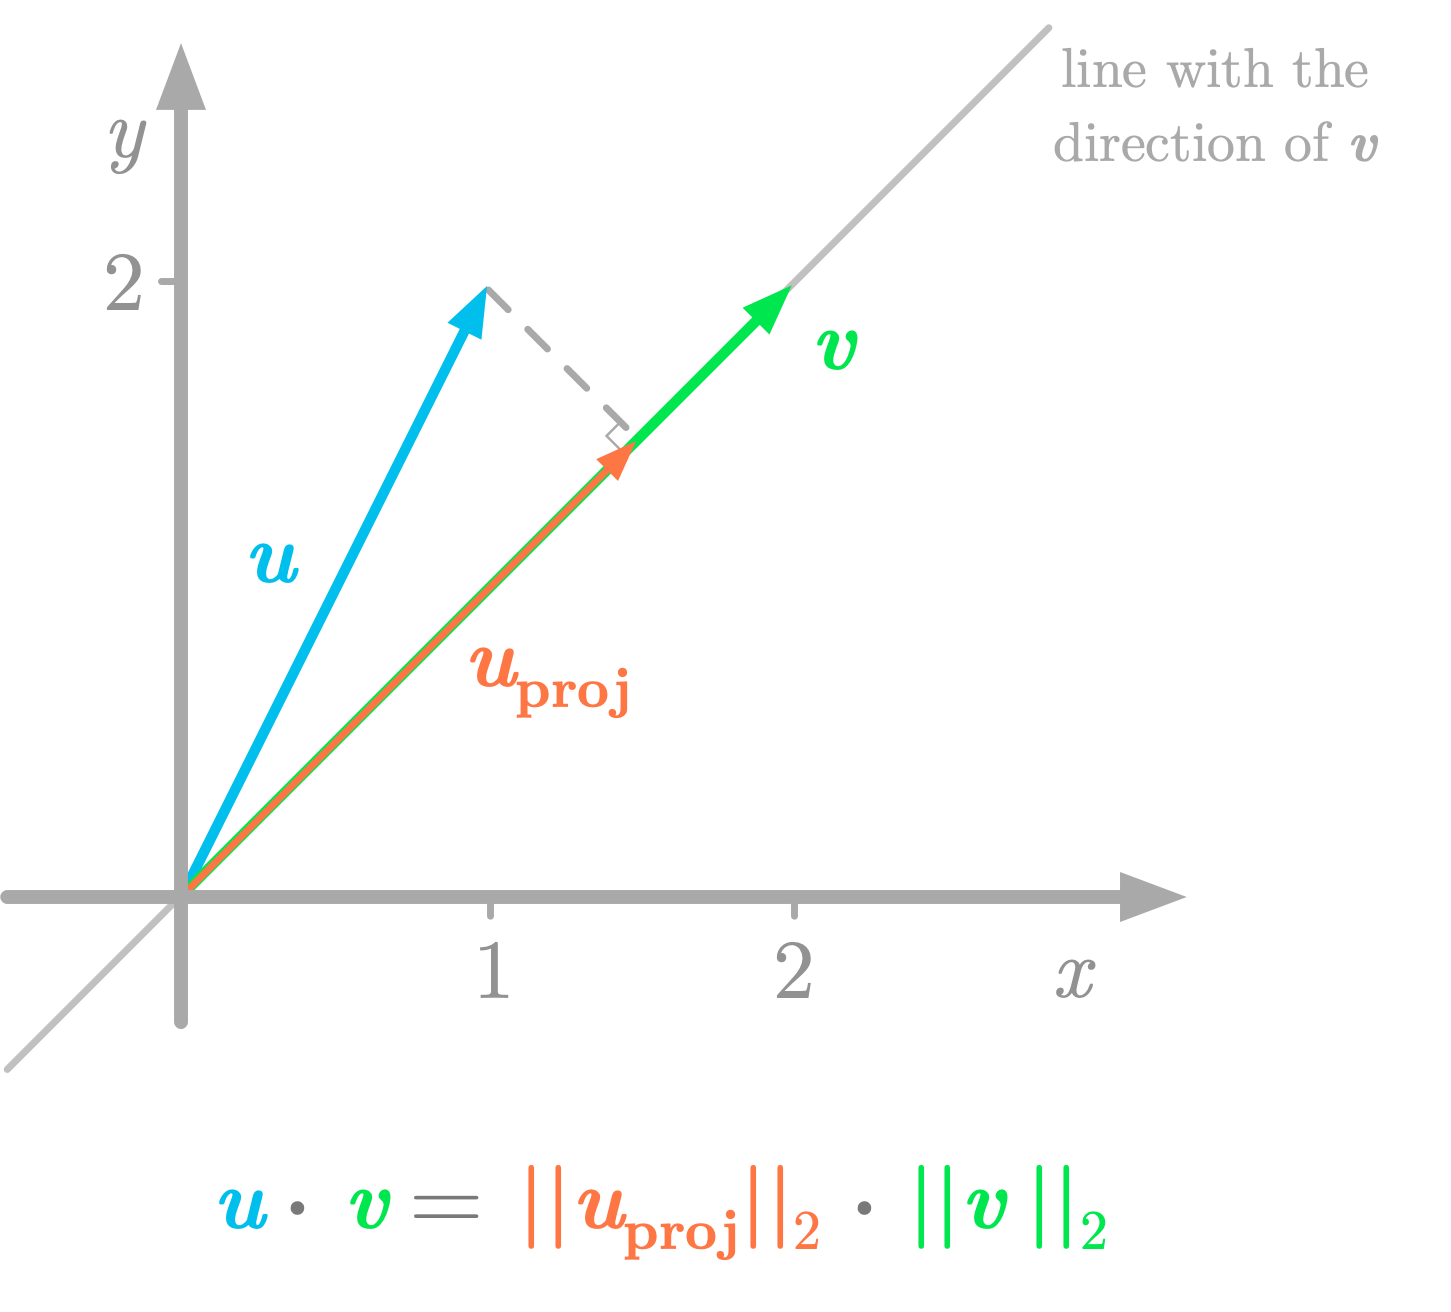<figcaption aria-hidden="true">Figure 85: The dot product can be seen as the length of <span class="math inline">$\vv$</span> multiplied by the length of the projection (the vector <span class="math inline">$\vu_{\text{proj}}$</span>).</figcaption>
</figure>

As shown in Figure [85](#fig:ch06_dot_product_vectors_geo), the
projection of $\vu$ on the line with the direction of $\vv$ is like the
shadow of the vector $\vu$ on this line. The value of the dot product (6
in our example) corresponds to the multiplication of the length of $\vv$
(the $L^2$ norm $\norm{\vv}$) and the length of the projection of $\vu$
on $\vv$ (the $L^2$ norm $\norm{\vu_{\text{proj}}}$). You want to
calculate:

$$
\norm{\vu_{\text{proj}}}_2 \cdot \norm{\vv}_2 \phantom{s}
$$

Note that the elements are scalars, so the dot symbol refers to a
multiplication of these values. And you have:

$$
\norm{\vv}_2 = \sqrt{2^2 + 2^2} = \sqrt{8}
$$

The projection of $\vu$ onto $\vv$ is defined as following (you can
refer to Section 8.3.3 to
see the mathematical details about the projection of a vector onto a
line):

$$
\vu_{\text{proj}} = \frac{\vu^{\text{T}}\vv}{\vv^{\text{T}}\vv}\vv = \frac{6}{8}\vv = 0.75\vv
$$

So the $L^2$ norm of $\vu_{\text{proj}}$ is the $L^2$ norm of 0.75 times
$\vv$:

$$
\norm{\vu_{\text{proj}}}_2 = 0.75 \norm{\vv}_2 = 0.75 \cdot \sqrt{8}
$$

Finally, the multiplication of the length of $\vv$ and the length of the
projection is:

$$
\norm{\vv}_2 \cdot \norm{\vu_{\text{proj}}}_2 = 0.75 \cdot \sqrt{8} \cdot \sqrt{8} = 0.75 \cdot 8 = 6
$$

This shows that you can think of the dot product on geometric vectors as
a projection. Using the projection gives you the same result as with the
dot product formula.

Furthermore, the value that you obtain with the dot product tells you
the relationship between the two vectors. If this value is positive, the
angle between the vectors is less than 90 degrees, if it is negative,
the angle is greater than 90 degrees, if it is zero, the vectors are
orthogonal and the angle is 90 degrees.

### 5.4.3 Properties

Let’s review some properties of the dot product.

##### Distributive

The dot product is *distributive*. This means that, for instance, with
the three vectors $\vu$, $\vv$ and $\vw$, we have:

$$
\vu \cdot (\vv + \vw) = \vu \cdot \vv + \vu \cdot \vw
$$

##### Associative

The dot product is not *associative*, meaning that the order of the
operations matters. For instance:

$$
\vu \cdot (\vv \cdot \vw) \neq (\vu \cdot \vv) \cdot \vw
$$

The dot product is not a binary operator: the result of the dot product
between two vectors is not another vector (but a scalar).

##### Commutative

The dot product between vectors is said to be *commutative*. This means
that the order of the vectors around the dot product doesn’t matter. We
have:

$$
\vu \cdot \vv = \vv \cdot \vu
$$

However, be careful, because this is not necessarily true for matrices.

5.5 Hands-on Project: Regularization
------------------------------------

### 5.5.1 Introduction

In machine learning and deep learning, it happens that your model
performs well on your training data but fails to generalize to new data.
It can be that the training data are very well described by the model
and that even the noise or the specificities of the dataset are
considered.

This is called *overfitting*. Models that overfit have large parameter
values (as explained in Bishop, Christopher M. Pattern recognition and
machine learning. springer, 2006 on page 8.) . You want to avoid that
because large parameter values means hight sensitivity of the model,
which leads to overfitting and unstable networks (you can find more
details here:
https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks.)
.

One way to reduce overfitting is to increase the size of the training
dataset to compensate this sensitivity. Another way is to constraint the
parameters to be small to avoid too sensitive models. It gives machine
learning algorithms a preference for a solution that may be suboptimal
on the training set but that generalizes better.

The various strategies used to constraint model’s parameters in order to
improve the generalization of the performances (even if this means
decrease the performance in the training set) are called
*regularization*.

How does it work? The model learns the best parameter values according
to the loss function. With regularization, you punish large parameter
values by adding a extra term to the loss function. You construct this
term to consider the values of the parameters. Large parameter values
will increases the loss, and thus the model will try to fit the data
while keeping the parameters small.

This extra term is constructed as the norm of the vector containing all
the parameter values. You’ll compare here two regularization methods
using the $L^1$ norm and the $L^2$ norm.

Note that there is no one best regularization strategy but that it
depends on the problem your trying to solve. This is called the *no free
lunch theorem*. (see Goodfellow, Ian, Yoshua Bengio, and Aaron
Courville. Deep learning. MIT press, 2016., p.118)

#### Loss Functions and Regularization

Let’s first clarify the difference between the norms used in loss
functions and in regularization. It can be confusing at first to see
norms like $L^1$ or $L^2$ used in these two contexts.

For cost functions, you calculate the norm of an “error vector”. What we
loosely call an error vector here is a vector containing the errors of a
model (the differences between the values estimated by the model and the
true values). The length of this vector tells you the overall quality of
the fit.

With regularization, you calculate the norm of the “parameter vector”
(the vector that contains all parameter values). The norm of this vector
tells you how large the overall parameter values are.

Each norm for lost function is associated with pros and cons. For
instance, a model using the $L^1$ norm as a loss function has the
advantage to be more robust to outliers in comparison to $L^2$, where
the extreme values are weighted more than the low values (because of the
squaring).

#### Regularization rate

You can modulate the importance of the regularization by an
*hyperparameter* (a parameter not optimized during the training) which
is multiplied by the regularization term. It is usually referred to as
$\alpha$ (a Greek letter pronounced “alpha”) and sometimes called
*regularization parameter* or *regularization rate*.

A large value of $\alpha$ implies that the solution found by the
algorithm will be largely influenced by the regularization term, while a
value of $\alpha$ equals to zero means that there is no regularization
at all.

This hands-on project assume that you have some understanding of cost
functions, more specifically to the MSE cost function for linear
regression (you can refer to
Section 1.3.1).

##### Regularization Using the $L^1$ Norm

In the case of regularization, the $L^1$ norm tends to produce sparse
weights (with a small number of non-zero values), meaning that some
parameters will be weighted to zero. This can be considered as feature
selection, as you can discard the corresponding parameters. Let’s see
how to create the regularized cost function using the MSE cost function
(you can refer to Section 1.3.1 ).

You saw in Section 5.3.2.3 that the $L^1$
norm of a vector $\vx$ is defined as the sum of the absolute values of
the vector components:

$$
\norm{\vx}_1 = \sum_{i=1}^m \left| \evx_i \right|
$$

with $\vx$ the vector, $m$ the number of entries in this vector, and $i$
the current index.

In the case of linear regression, you optimize two parameters (here
called $\theta_0$ and $\theta_1$). You saw in
Section 1.3.1 that the cost function
is defined as:

$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1} ^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
$$

This is for the case of a single feature $x$, leading to a model with
two parameters (intercept and slope). The scalar $m$ is the number of
data samples. The errors are the differences between the prediction of
the model ($\theta_0 + \theta_1 x^{(i)}$) and the true values $y^{(i)}$.

To apply a $L^1$ regularization to your model, you add the sum of the
absolute values of the parameter vector to the cost function:

$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1} ^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2 + \alpha \sum_{i=1}^n \left| \theta_i \right|
$$

With $n$ being the number of parameters (here, two: $\theta_0$ and
$\theta_1$). You can see that the extra term
$\sum_{i=1}^n \left| \theta_i \right|$ is multiplied by the
regularization parameter $\alpha$.

##### Regularization Using the $L^2$ Norm

Similarly, you can regularize the MSE cost function using the squared
$L^2$ norm. We denote this regularization as the $L^2$ regularization:

$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1} ^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2 + \alpha \sum_{i=1}^n\theta_i^2
$$

The principle is the same as with the $L^1$ norm: you add a
regularization term that will constraint the parameter values to be
small. You’ll see next the differences between $L^1$ and $L^2$
regularization.

### 5.5.2 Effect of Regularization on Polynomial Regression

To see the effect of regularization, let’s see the case of *polynomial
regression*, which is a form of regression combining the powers of the
features to create new features. For instance, if your only feature is
$x$, the degree-3 polynomials features are $x^2$ and $x^3$. Instead of
having the linear equation $y=ax + b$, you’ll have
$y=ax + b + cx^2 + dx^3$, meaning that you now have four parameters to
optimize.

#### Data

In this hands-on, you’ll use polynomial regression to model the total
number of cases of COVID-19 in France (Ile-de-France area) in March 2020
(the data comes from
https://www.data.gouv.fr/en/datasets/cas-confirmes-dinfection-au-covid-19-par-region/)
. Since the growth of the number of cases is (unfortunately) not linear,
you’ll use polynomials features to model the data.

Let’s first load and plot the data:

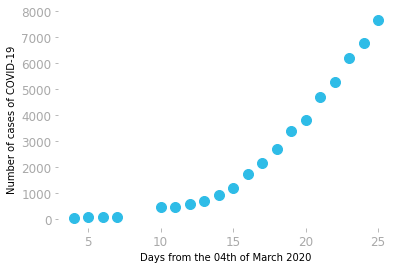

In [14]:
data_covid = pd.read_csv("https://raw.githubusercontent.com/hadrienj/" \
    "essential_math_for_data_science/master/data/covid19.csv")
data_covid['days'] = data_covid["Date"].str.split("/").apply(lambda x: x[2]).astype(int)

plt.scatter(data_covid['days'], data_covid["Ile-de-France"])

plt.xlabel("Days from the 04th of March 2020")
plt.ylabel("Number of cases of COVID-19")
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 86: Number of cases of COVID19 in France (Ile-de-France area) in March 2020.</figcaption>
</figure>

You can see in Figure [86](#fig:ch06_output_covid_cases) that the number
of cases increases in a non-linear way. Few days are missing at the
beginning but it is not important here.

Let’s create the variables you need to do polynomial regression. The
only feature is the number of day since the first day (the 04th of
March), represented as integers. The number of cases is the dependent
variable. You can use the function `reshape(-1, 1)` to have the features
in the right shape for Sklearn (it doesn’t want one-dimensional arrays):

In [15]:
X = data_covid['days'].to_numpy().reshape(-1, 1)
y = data_covid["Ile-de-France"].to_numpy()

When your train a model that fits your training data very well, it can
be the case that it is overfitting, meaning that even the noise of the
dataset is taken into consideration, leading to lack of generalization
to unseen data.

To observe this effect, and how regularization can fix it, let’s add
some random noise to the data. It simulates noisy measurements, and will
allow you to see how overfitting can be encountered and handled. You can
use `np.random.normal` to add a normally distributed noise to the data,
however, you’ll also weight the noise we add to have more noise
associated with the large value of `X`.

In [16]:
np.random.seed(1)
y_noise = y + (np.random.normal(0, 100, X.shape[0]) * X.flatten()).flatten()

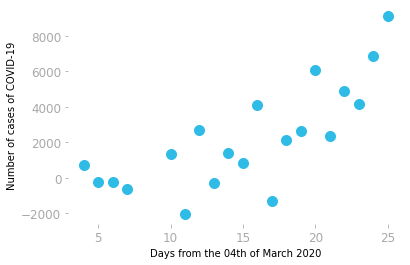

In [17]:
plt.scatter(X, y_noise)

plt.xlabel("Days from the 04th of March 2020")
plt.ylabel("Number of cases of COVID-19")
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 87: Noisy data will allow you to see the effect of overfitting and regularization.</figcaption>
</figure>

Figure [87](#fig:ch06_output_covid_cases_noisy) shows the data after the
addition of noise. It will allow you to visualize regularization
effects, as you’ll soon see.

Regularized models are often sensitive to differences in scale in the
data, so you need to normalize the data. You can use standardization (it
transforms the data such as the mean is equals to 0 and the standard
deviation is equals to 1) using the `StandardScaler` from Sklearn:

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X_transformed = scaler.transform(X)
y_noise_transformed = scaler.transform(y_noise.reshape(-1, 1)).flatten()
y_transformed = scaler.transform(y.reshape(-1, 1)).flatten()

You now need to create the powers of the feature $x$. An easy way to do
it is to use Sklearn `PolynomialFeatures` that adds all polynomial
combinations. In our case, we have a single feature, and thus, there is
no combination: it will add the additional features $x^2$, $x^3$ etc.

To observe overfitting, you’ll use a degree-10 of polynomial features
(high degree polynomials create complex models that can easily overfit):

In [19]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(10, include_bias=False)
X_poly = poly.fit_transform(X_transformed)


The option `include_bias=False` avoids the column of 1 created by
`Polynomialfeatures` corresponding to the feature $x^0$. The variable
`X_poly` contains now your new features. Here are, for instance, the two
first rows:

In [20]:
X_poly[:2]

array([[  -1.74873638,    3.05807893,   -5.34777387,    9.35184673,
         -16.3539146 ,   28.59868542,  -50.01156162,   87.45703723,
        -152.93930272,  267.45052265],
       [  -1.59119256,    2.53189377,   -4.02873054,    6.41048606,
         -10.20031774,   16.23066973,  -25.82612095,   41.09433157,
         -65.38899474,  104.04648209]])

The ten columns correspond respectively to the following features:
$x^0, x^1, x^2 \cdots x^{10}$. The first column $x^0$ is thus a column
filled with 1 (which is not included with `include_bias=False`) and the
second column contains the values of $x^1$ which is just $x$.

You’ll now do a linear regression using the polynomial features as
input. It will optimize the weight of each feature ($x$, $x^2$, $x^3$
etc).

To see the effect of the regularization you’ll use a linear model using
a MSE cost function with $L^2$ regularization, which is called *ridge
regression*.

Let’s use the class `Ridge` from Sklearn and iterate over different
values of the regularization parameter $\alpha$. At each iteration,
you’ll fit a new model with the corresponding value of $\alpha$, do the
prediction on a range of values, and finally use these predictions to
plot the regression curve.

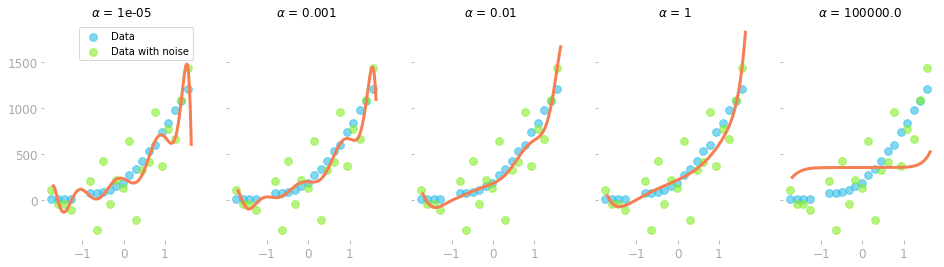

In [21]:
from sklearn.linear_model import Ridge

X_axis = np.arange(-1.7, 1.65, 0.01)
X_axis_poly = poly.fit_transform(X_axis.reshape(-1, 1))

f, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=True)


count = 0

for alpha, ax in zip([0.00001, 0.001, 0.01, 1, 1e5], axes.flatten()):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly, y_noise_transformed)
    y_axis_ridge = ridge.predict(X_axis_poly)

    ax.plot(X_axis_poly[:, 0], y_axis_ridge, c="#F57F53")
    ax.scatter(X_transformed, y_transformed,
                alpha=0.6, s=60, label="Data")
    ax.scatter(X_transformed, y_noise_transformed,
                alpha=0.6, s=60, label="Data with noise")
    ax.set_title(r"$\alpha$" + f" = {alpha}")
    # [...] Figure titles, legend...
    
    if count ==  0:
        ax.legend()
    count += 1
    

<figure>
<figcaption aria-hidden="true">Figure 88: Effect of the regularization rate <span class="math inline"><em>α</em></span>.</figcaption>
</figure>

You can see the effect of regularization in Figure
[88](#fig:ch06_output_regularization_rate). Raw data is shown in blue
and data with noise in green. The red curve is the regression curve.

In the first plot, the hyperparameter $\alpha$ is very small, leading to
almost no regularization. You can see that the model is overfitting
because the oscillations fit also the noise. When you increase $\alpha$,
the regularization is more important and the curve is smoother. Finally,
with $\alpha=1$, the fit is simpler and ignore a good part of the noise.
However, if the value of $\alpha$ is too large, the model becomes too
simple and the regression curve is almost an horizontal line.

You can see how the mathematical concept of norm explains how
regularization works. As you see in Figure
[88](#fig:ch06_output_regularization_rate), adding a term with the norm
of the parameter vector has the effect to constrain the model to be
simpler, which often leads to reducing overfitting.

### 5.5.3 Differences between $L^1$ and $L^2$ Regularization

In this last part, you’ll visualize how the parameters are optimized and
how they are changing during the training (using gradient descent), and
what are the differences between the $L^1$ and the $L^2$ norms.

In the previous section, we use the class `Ridge` from Sklearn, which
uses the closed-form solution of the ridge regression expression (you’ll
learn more about it in
Section 8.4).
The other way to find the best parameters is to use gradient descent, as
you saw in Section 1.3. You’ll use
this method to visualize how the parameters change from their initial
value (0 because of *zero-initialization*) to the best combination
during the training, and look at how the parameters update epoch by
epoch.

#### Creating the Polynomial Features

To visualize the parameters, you’ll use degree-2 polynomials to be able
to visualize the *parameter space* in two dimensions (one parameter in
each axis). (the intercept of the model is also learned, but it is not
influenced by regularization so we can’t use it for the purpose of this
hands-on project.)

Let’s create the features, as we did before:

In [22]:
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

Here are the first three rows of your features (the first column is $x$
and the second $x^2$):

In [23]:
X_poly[:3]

array([[-1.74873638,  3.05807893],
       [-1.59119256,  2.53189377],
       [-1.43364874,  2.05534872]])

Let’s start by finding the best parameters for an unregularized model
using the class `LinearRegression`:

In [24]:
from sklearn.linear_model import LinearRegression

reg_poly = LinearRegression()
reg_poly.fit(X_poly, y_transformed)

LinearRegression()

Note that we used the raw data and not the data with added noise. The
parameters are stored in the attribute named `.coef_` and the intercept
in `.intercept_`:

In [25]:
reg_poly.coef_

array([382.47220015, 157.18454754])

In [26]:
reg_poly.intercept_

228.15975420975187

Keep in mind the mathematical meaning of this. It means that the model
is mathematically defined as the following equation:

$$
y = 382.47220015 x + 157.18454754 x^2 + 228.15975420975187
$$

#### Using Gradient Descent

##### Progression of Parameter Values Without Regularization

Now that you know the best parameters, let’s use gradient descent to see
how the parameters are learned. Let’s start by initializing the class
`SGDRegressor` (the Sklearn implementation of gradient descent) without
regularization. This will allow you to visualize the progression of the
parameters from the initial values to the best combination.

In [27]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=10000, random_state=123,
                       learning_rate='constant', eta0=0.01, penalty=None)


By default, `SGDRegressor` uses a $L^2$ regularization so you need to
use `penalty=None` to have no regularization. The parameter
`learning_rate` tells how the weights are updated and `eta0` corresponds
to the initial value of the learning rate (with
`learning_rate='constant'`, it will be the only value).

Now, you’ll run epochs using `partial_fit`, which updates parameters
only once. You can store parameter values at each epoch to be able to
visualize the process of the training:

In [28]:
history_theta_0 = [0]
history_theta_1 = [0]
for i in range(30):
    sgd_reg.partial_fit(X_poly, y_transformed)
    
    history_theta_0.append(sgd_reg.coef_[0].copy())
    history_theta_1.append(sgd_reg.coef_[1].copy())


##### Best Parameters with $L^1$ and $L^2$ and Various $\alpha$

Let’s use $L^1$ and $L^2$ regularization with different values of the
regularization rate $\alpha$ to see its influence.

Let’s start with $L^1$ regularization:

In [29]:
alpha_theta_0_l1 = []
alpha_theta_1_l1 = []


all_alpha_l1 = np.arange(0, 500, 20)
for alpha in all_alpha_l1:
    sgd_reg_l1 = SGDRegressor(max_iter=10000, verbose=0, random_state=123,
                       learning_rate='constant', eta0=0.0001, penalty='l1', alpha=alpha)
    sgd_reg_l1.fit(X_poly, y_transformed)
    
    alpha_theta_0_l1.append(sgd_reg_l1.coef_[0].copy())
    alpha_theta_1_l1.append(sgd_reg_l1.coef_[1].copy())


The array `all_alpha_l1` contains various values of the regularization
rate $\alpha$ used in `SGDRegressor`. For each value of $\alpha$, a new
model is created, fitted to the data, and the model coefficients are
stored.

Let’s do the same for $L^2$ regularization:

In [30]:
alpha_theta_0_l2 = []
alpha_theta_1_l2 = []

all_alpha_l2 = np.arange(0, 50, 0.2)
for alpha in all_alpha_l2:
    sgd_reg_l2 = SGDRegressor(max_iter=10000, verbose=0, random_state=123,
                       learning_rate='constant', eta0=0.0001, penalty='l2', alpha=alpha)
    sgd_reg_l2.fit(X_poly, y_transformed)
    
    alpha_theta_0_l2.append(sgd_reg_l2.coef_[0].copy())
    alpha_theta_1_l2.append(sgd_reg_l2.coef_[1].copy())
    

In [31]:

x_space = np.linspace(-400, 400, 100)
y_space = np.linspace(-400, 400, 100)

X_space, Y_space = np.meshgrid(x_space, y_space)

def cost_function_l1(X, Y):
    Z = np.abs(X) + np.abs(Y)
    return Z
    
def cost_function_l2(X, Y):
    Z = np.sqrt(np.square(X) + np.square(Y))
    return Z

def cost_function_max(X, Y):
    Z = np.maximum(np.abs(X), np.abs(Y))
    return Z

    
Z_1 = cost_function_l1(X_space, Y_space)
Z_2 = cost_function_l2(X_space, Y_space)
Z_3 = cost_function_max(X_space, Y_space)



That’s good, you can now plot all of how the parameters change for $L^1$
and $L^2$ regularization.

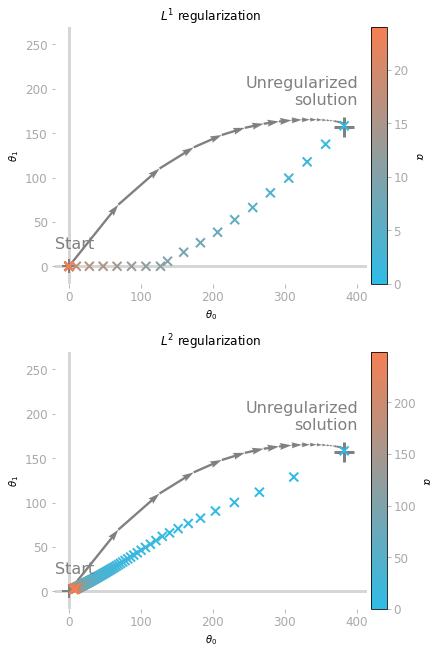

In [32]:

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors

custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#2EBCE7","#F57F53"])

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
axes = axes.flatten()

for i in range(axes.shape[0]):
    axes[i].quiver(np.array(history_theta_0)[:-1],
                   np.array(history_theta_1)[:-1],
                   np.array(history_theta_0)[1:] - np.array(history_theta_0)[:-1],
                   np.array(history_theta_1)[1:] - np.array(history_theta_1)[:-1], 
                   angles='xy', scale_units='xy', scale=1, color="gray")
    axes[i].scatter(history_theta_0[0], history_theta_1[0], c="gray", s=200, marker="+", linewidth=2)
    axes[i].scatter(reg_poly.coef_[0], reg_poly.coef_[1], c="gray", marker="+", s=400, zorder=0)
    axes[i].text(history_theta_0[0] - 20,
                 history_theta_1[0] + 20,
                 r'Start', color="gray", size=16)
    axes[i].text(history_theta_0[-1] + (history_theta_0[-1] / 20),
                 history_theta_1[-1] + (history_theta_1[-1] / 7),
                 'Unregularized\nsolution', color="gray", size=16, horizontalalignment="right")
    
    # draw axes
    axes[i].axhline(0, c='#d6d6d6', zorder=-1)
    axes[i].axvline(0, c='#d6d6d6', zorder=-1)

    axes[i].set_xlabel(r"$\theta_0$")
    axes[i].set_ylabel(r"$\theta_1$")
    
    axes[i].set_xlim(-20, 415)
    axes[i].set_ylim(-20, 270)


scatter0 = axes[0].scatter(alpha_theta_0_l1, alpha_theta_1_l1, c=np.arange(len(alpha_theta_1_l1)),
                cmap=custom_cmap, s=80, marker="x", linewidth=2)

divider = make_axes_locatable(axes[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = f.colorbar(scatter0, cax=cax, orientation='vertical')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'$\alpha$', rotation=270)
axes[0].set_title("$L^1$ regularization")


scatter1 = axes[1].scatter(alpha_theta_0_l2, alpha_theta_1_l2, c=np.arange(len(alpha_theta_1_l2)),
                cmap=custom_cmap, s=80, marker="x", linewidth=2)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = f.colorbar(scatter1, cax=cax, orientation='vertical')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'$\alpha$', rotation=270)
axes[1].set_title("$L^2$ regularization")



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 89: Visualization of the effect of <span class="math inline"><em>L</em><sup>1</sup></span> (left) and <span class="math inline"><em>L</em><sup>2</sup></span> regularization in the parameter space (<span class="math inline"><em>θ</em><sub>1</sub></span> as a function of <span class="math inline"><em>θ</em><sub>0</sub></span>). The gray arrows shows the path in the case of no regularization. The crosses correspond to solutions with regularization, and the color shows the amount of regularization (values of <span class="math inline"><em>α</em></span>).</figcaption>
</figure>

Figure [89](#fig:ch06_output_regularization) shows the parameters
$\theta_1$ ($y$-axis) as a function of $\theta_0$ ($x$-axis) in the
context of gradient descent. The learning path without regularization is
shown as the gray arrows (each arrow corresponds to one epoch). They go
from the initial point (zero for both parameters) to the best solution
when there is no regularization.

The solution found with gradient descent is different if you use
regularization. The cross symbols correspond to the solutions found with
a specific value of $\alpha$ (this value is given by the color of the
symbol). When $\alpha$ equals zero (blue cross symbols), the
regularization term equals zero, so you’re in the case of no
regularization and the point is close to the unregularized solution.
When $\alpha$ is larger, the regularization is stronger, until the
solution approaches zero (red cross symbols) because the model wants
only minimize the norm of the parameter vector.

You can then compare the positions of the cross symbols with $L^1$
(left) and $L^2$ (right). With $L^1$ regularization, one of the two
parameters ($\theta_0$) is pulled toward zero when regularization gets
stronger, and only then, the other parameter ($\theta_1$) goes to zero.
This shows a major characteristic of the $L^1$ regularization: it
enforces the sparsity of the parameters. This means that the parameters
are constraints to be small with the strategy to set some of the
parameters to zero instead of reducing all of them. This can be use as
feature selection.

With $L^2$ regularization, both $\theta_0$ and $\theta_1$ are similarly
pulled toward zero when $\alpha$ increases: it prefers parameters near
but different than zero (you can see this page of the machine learning
crash course by Google to have an idea of the distribution of the
parameters with the $L^2$ regularization:
https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/lambda.)
.

#### Visualizing Regularized Cost Functions

To finish the hands-on project, you’ll create contour plots of cost
functions regularized with $L^1$ and $L^2$. You’ll see that the cost
function depends heavily on the regularization parameter $\alpha$.

To create these plots, you need to calculate the cost for any
combinations of parameters in the range you want to visualize. This is a
job for the Numpy function `np.meshgrid`: you input one-dimensional
arrays (vectors) corresponding to the ranges of $\theta_0$ and
$\theta_1$ and it returns two two-dimensional arrays organized such that
if you take pairs of values from them, you get all possible
combinations.

In [33]:
theta_0_space = np.linspace(-300, 550, 100)
theta_1_space = np.linspace(-300, 550, 100)

theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_space, theta_1_space)

Next, you’ll create the MSE cost function that takes the data (`X` and
`y`), the weights (`theta_0`, `theta_1` and `intercept`), and the
regularization parameter $\alpha$. Note that the computation is not
fully vectorized to be easier to understand.

You’ll also implement the $L^1$ and $L^2$ norms:

In [34]:
def J(X, y, theta_0, theta_1, intercept):
    m = X.shape[0]
    sum_cost = 0
    for i in range(m):
        sum_cost += (((intercept + theta_0 * X[i, 0] + theta_1 * X[i, 1])) - y[i]) ** 2
            
    return (1 / (2 * m)) * sum_cost

def l1(theta_0, theta_1, alpha):
    return alpha * (np.abs(theta_0) + np.abs(theta_1))
    
def l2(theta_0, theta_1, alpha):
    return alpha * (theta_0 ** 2 + theta_1 ** 2)

Finally, let’s use the function `contourf` from Matplotlib to visualize
the cost function associated with various values of $\alpha$ for the
$L^1$ and $L^2$ regularizations:

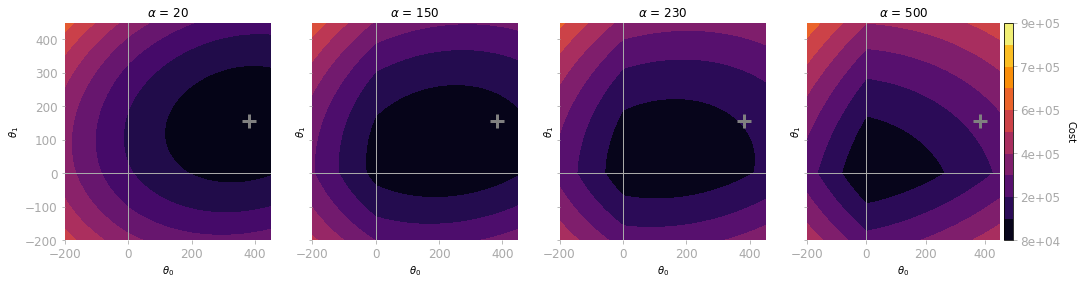

In [35]:
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4), sharey=True)

alpha_values = [20, 150, 230, 500]

for alpha, ax in zip(alpha_values, axes.flatten()):
    cost_contour = J(X=X_poly, y=y_transformed, theta_0=theta_0_mesh, theta_1=theta_1_mesh,
                 intercept=reg_poly.intercept_) + l1(theta_0_mesh, theta_1_mesh, alpha=alpha)

    contour_plot = ax.contourf(theta_0_mesh, theta_1_mesh, cost_contour, levels=10, zorder=0, cmap="inferno")
    ax.scatter(reg_poly.coef_[0], reg_poly.coef_[1], c="gray", marker="+", s=200, zorder=0)
    
    # [...] Add axes, limits, titles, etc.
    
    ax.set_xlim(-200, 450)
    ax.set_ylim(-200, 450)
    
    ax.set_title(r"$\alpha$ = " + f"{alpha}")
    
    ax.set_xlabel(r"$\theta_0$")
    ax.set_ylabel(r"$\theta_1$")
    
    ax.axhline(0, c='#a9a9a9', zorder=1, linewidth=1)
    ax.axvline(0, c='#a9a9a9', zorder=1, linewidth=1)
    

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = f.colorbar(contour_plot, cax=cax, orientation='vertical', format='%.0e')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Cost', rotation=270)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 90: The MSE cost function with <span class="math inline"><em>L</em><sup>1</sup></span> regularization. The cost (dark colors corresponds to small costs) is represented for each pair of parameters <span class="math inline"><em>θ</em><sub>0</sub></span> and <span class="math inline"><em>θ</em><sub>1</sub></span>, and for different value of <span class="math inline"><em>α</em></span>.</figcaption>
</figure>

You can see in Figure [90](#fig:ch06_output_regularization_l1) that the
cost function changes when the regularization parameter increases. It
tends to have the shape of the $L^1$ regularization term (you can look
in Figure [91](#fig:ch06_output_contour_l1_l2) at the $L^1$ and $L^2$
regularization terms alone).

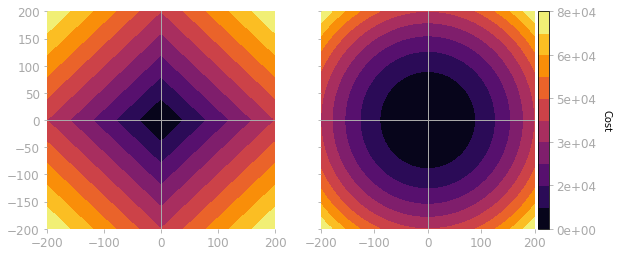

In [36]:
theta_0_space_reg = np.linspace(-200, 200, 100)
theta_1_space_reg = np.linspace(-200, 200, 100)

theta_0_mesh_reg, theta_1_mesh_reg = np.meshgrid(theta_0_space_reg, theta_1_space_reg)

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

contour_plot = axes[0].contourf(theta_0_mesh_reg, theta_1_mesh_reg, l1(theta_0_mesh_reg, theta_1_mesh_reg, alpha=1),
                           levels=10, zorder=0, cmap="inferno")

contour_plot = axes[1].contourf(theta_0_mesh_reg, theta_1_mesh_reg, l2(theta_0_mesh_reg, theta_1_mesh_reg, alpha=1),
                           levels=10, zorder=0, cmap="inferno")

for ax in axes.flatten():
    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    
    
    ax.axhline(0, c='#a9a9a9', zorder=1, linewidth=1)
    ax.axvline(0, c='#a9a9a9', zorder=1, linewidth=1)
    


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = f.colorbar(contour_plot, cax=cax, orientation='vertical', format='%.0e')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Cost', rotation=270)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 91: Regularization terms: <span class="math inline"><em>L</em><sup>1</sup></span> in the left plot and <span class="math inline"><em>L</em><sup>2</sup></span> in the right plot. Dark colors correspond to a smaller cost.</figcaption>
</figure>

Figure [91](#fig:ch06_output_contour_l1_l2) shows the contour plot of
the regularization term alone, without cost function.

Let’s now have a look at the $L^2$ regularized MSE cost function:

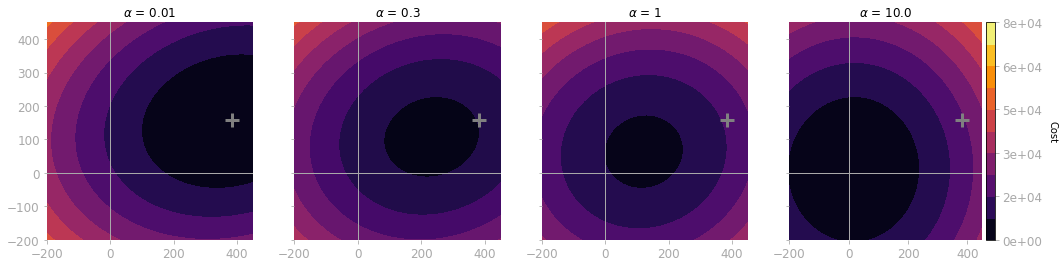

In [37]:
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4), sharey=True)
    
for alpha, ax in zip([0.01, 0.3, 1, 10.0], axes.flatten()):
    cost_contour = J(X=X_poly, y=y_transformed, theta_0=theta_0_mesh, theta_1=theta_1_mesh,
                 intercept=reg_poly.intercept_) + l2(theta_0_mesh, theta_1_mesh, alpha=alpha)

    ax.contourf(theta_0_mesh, theta_1_mesh, cost_contour, levels=10, zorder=0, cmap="inferno")
    ax.scatter(reg_poly.coef_[0], reg_poly.coef_[1], c="gray", marker="+", s=200, zorder=0)
    # [...] Add axes, limits, titles, etc.
    
    ax.set_title(r"$\alpha$ = " + f"{alpha}")
    
    ax.set_xlim(-200, 450)
    ax.set_ylim(-200, 450)
    
    ax.axhline(0, c='#a9a9a9', zorder=1, linewidth=1)
    ax.axvline(0, c='#a9a9a9', zorder=1, linewidth=1)
    


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = f.colorbar(contour_plot, cax=cax, orientation='vertical', format='%.0e')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Cost', rotation=270)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 92: The MSE cost function with <span class="math inline"><em>L</em><sup>2</sup></span> regularization. The cost (dark colors corresponds to small costs) is represented for each pair of parameters <span class="math inline"><em>θ</em><sub>0</sub></span> and <span class="math inline"><em>θ</em><sub>1</sub></span>, and for different value of the regularization parameter <span class="math inline"><em>α</em></span>.</figcaption>
</figure>

Figure [92](#fig:ch06_output_contour_reg_l2) shows again that
regularized cost functions tends to the $L^2$ term alone when the
regularization parameter increases. However, unlike with $L^1$, the
region where some parameters are equal to zero are not easily reached,
leading to a decrease of all the parameter values.

That’s great. I know there is a lot of things in this hands-on project
and that it is clearly for people with some background in machine
learning, so take some time on it. It shows you a practical case where
understanding the mathematical concepts underlying a machine learning
method can give you some insights on what is best in a specific
situation.

